# Data Exploration and Analysis

### IMPORT NECCESSARY LIBRARIES

In [1]:
# Import libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## EDA

First 5 rows of the Facebook dataset:
                  date  impressions  organic_impressions  viral_impressions  \
0  2013-02-10 21:10:00          0.0                  0.0                  0   
1  2013-02-28 18:00:00          0.0                  0.0                  0   
2  2013-03-14 10:00:00          0.0                  0.0                  0   
3  2013-04-02 15:33:00          0.0                  0.0                  0   
4  2013-04-09 08:56:00          0.0                  0.0                  0   

   non_viral_impressions  paid_impressions  engagement_rate_per_impression  \
0                      0                 0                             0.0   
1                      0                 0                             0.0   
2                      0                 0                             0.0   
3                      0                 0                             0.0   
4                      0                 0                             0.0   

   engagement_rate

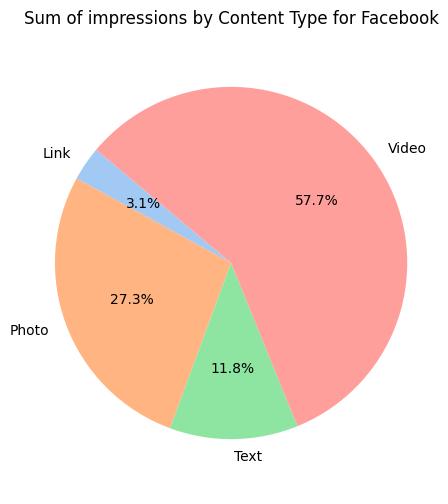

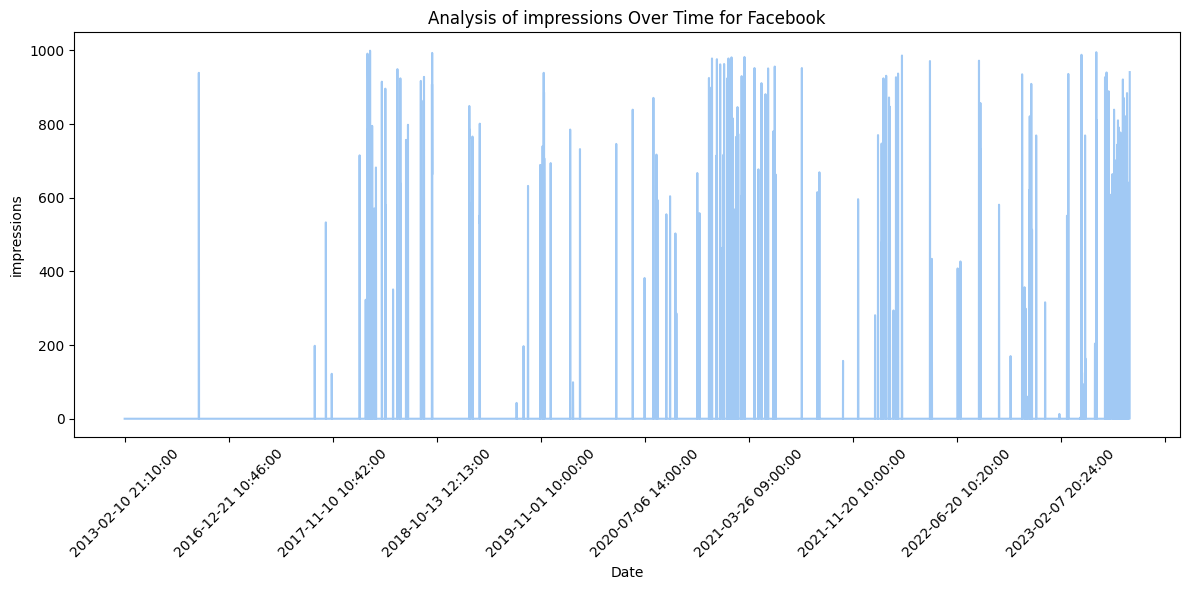

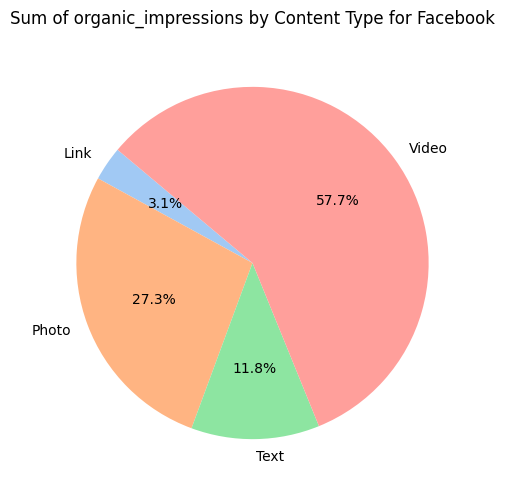

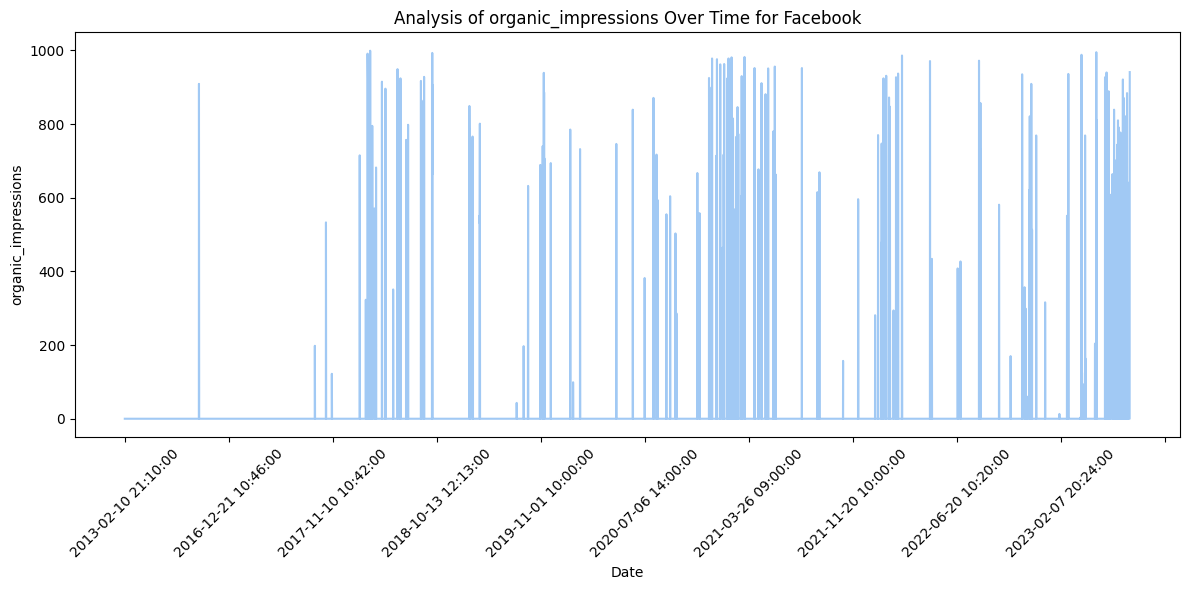

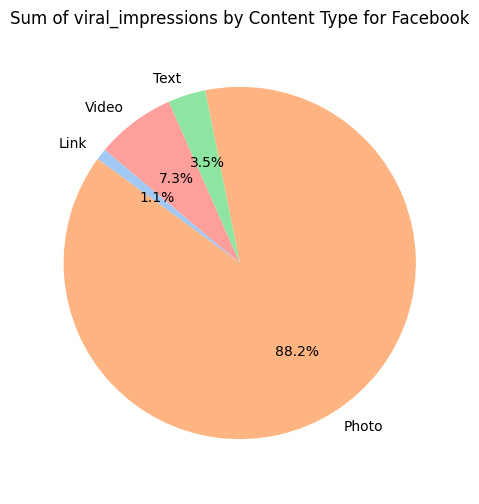

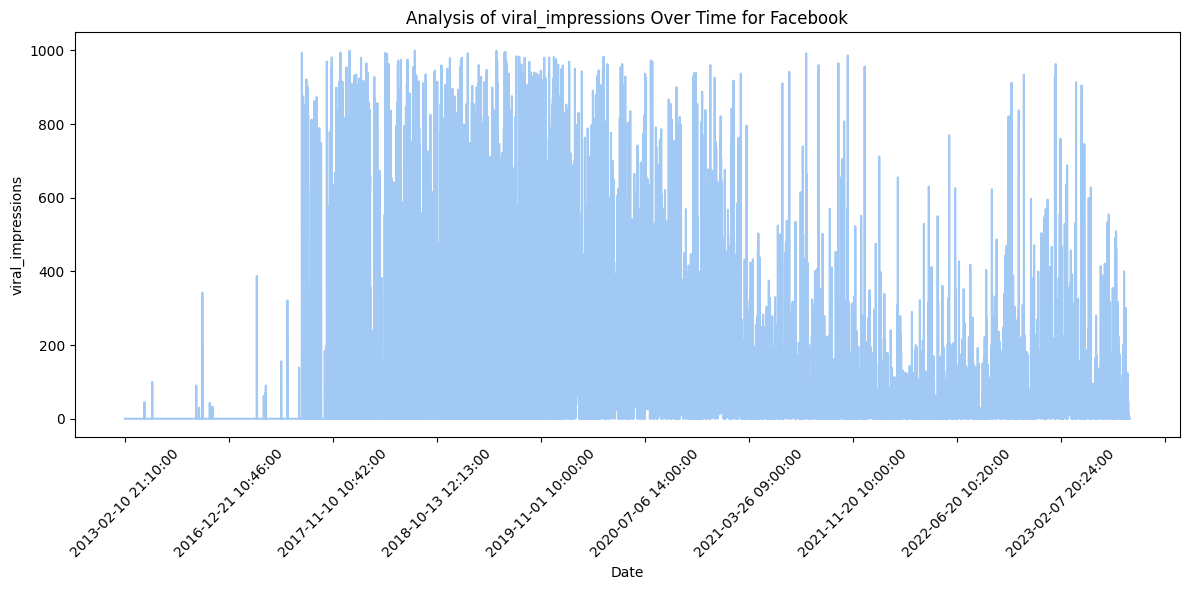

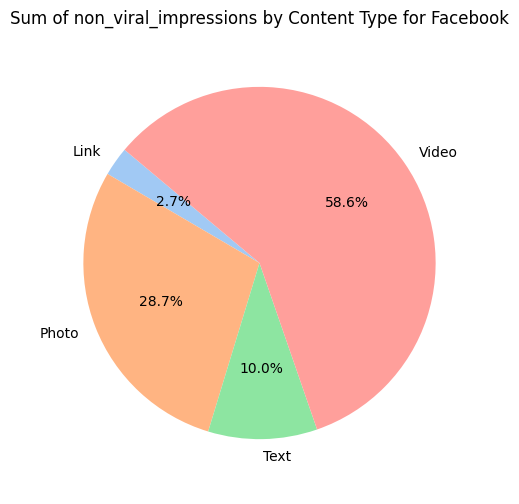

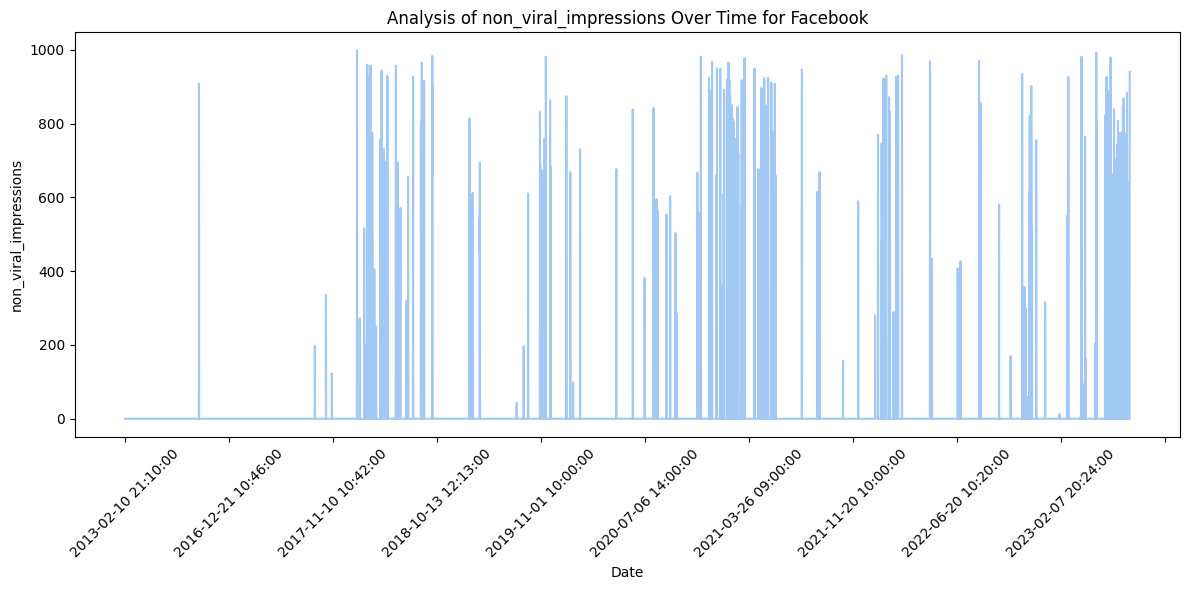

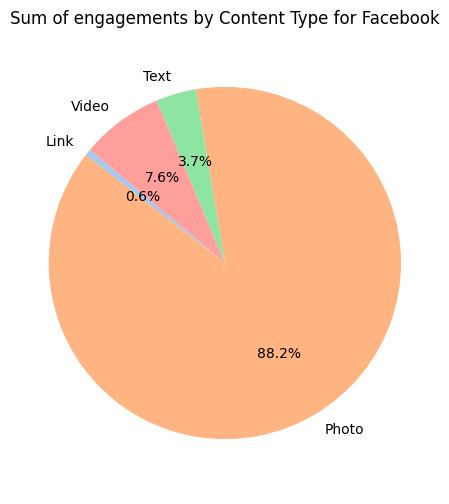

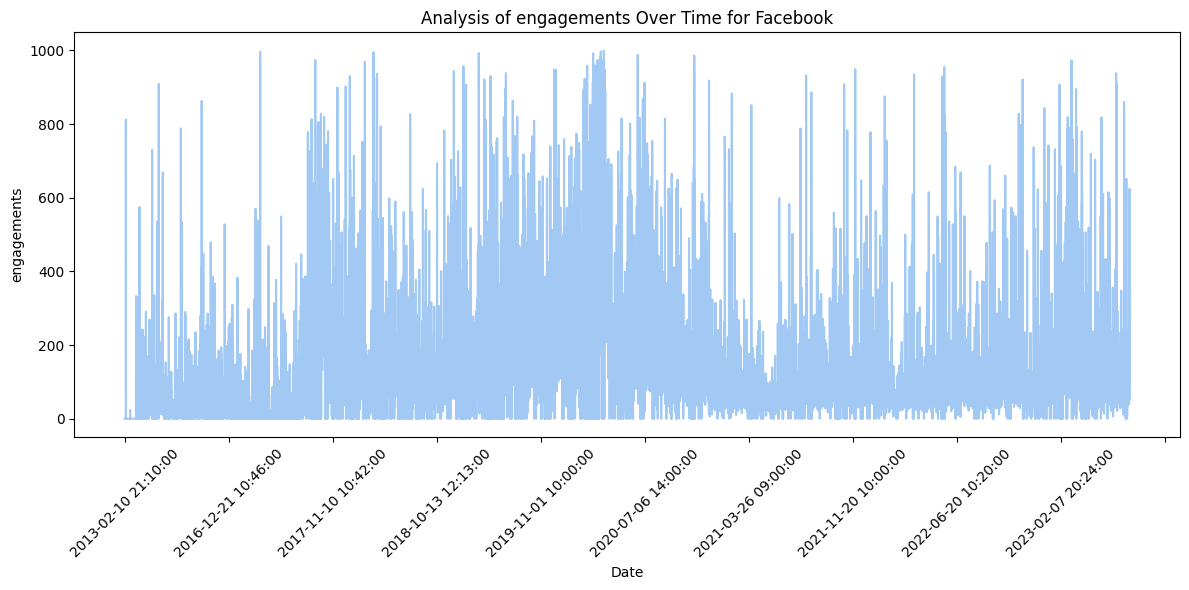

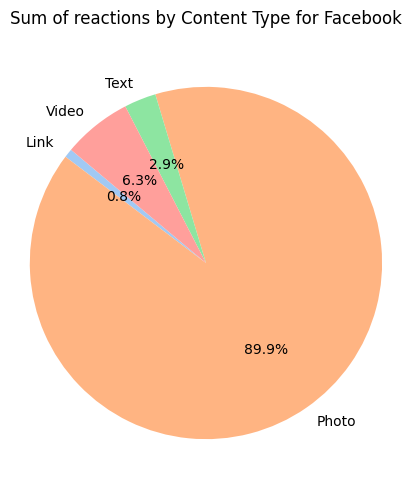

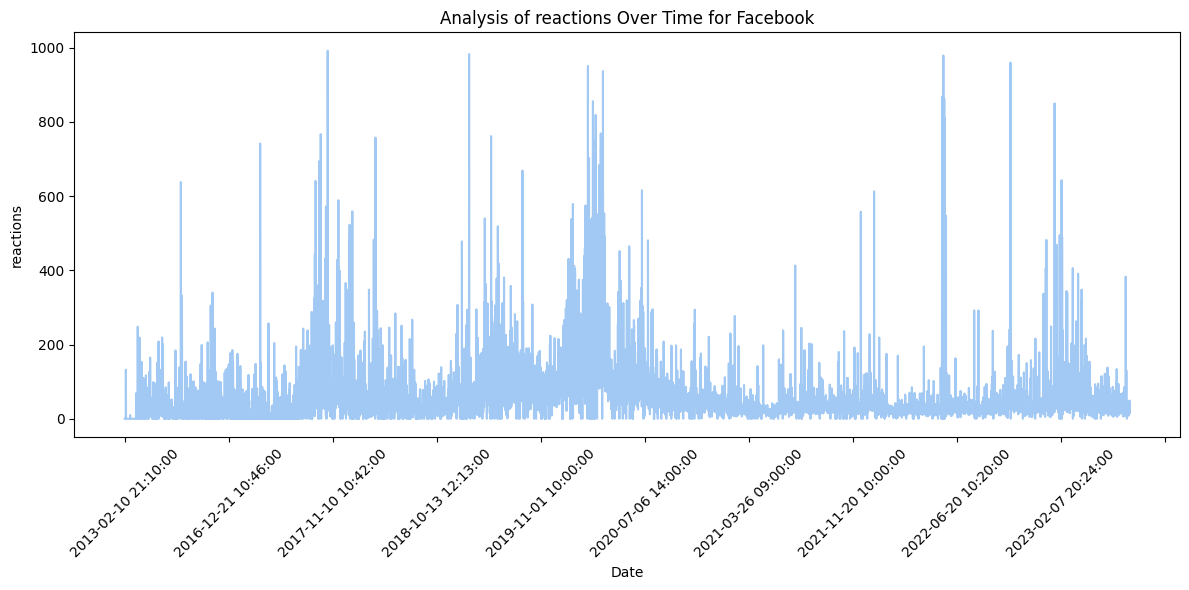

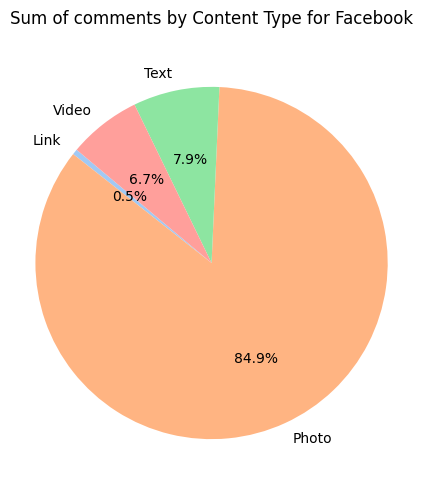

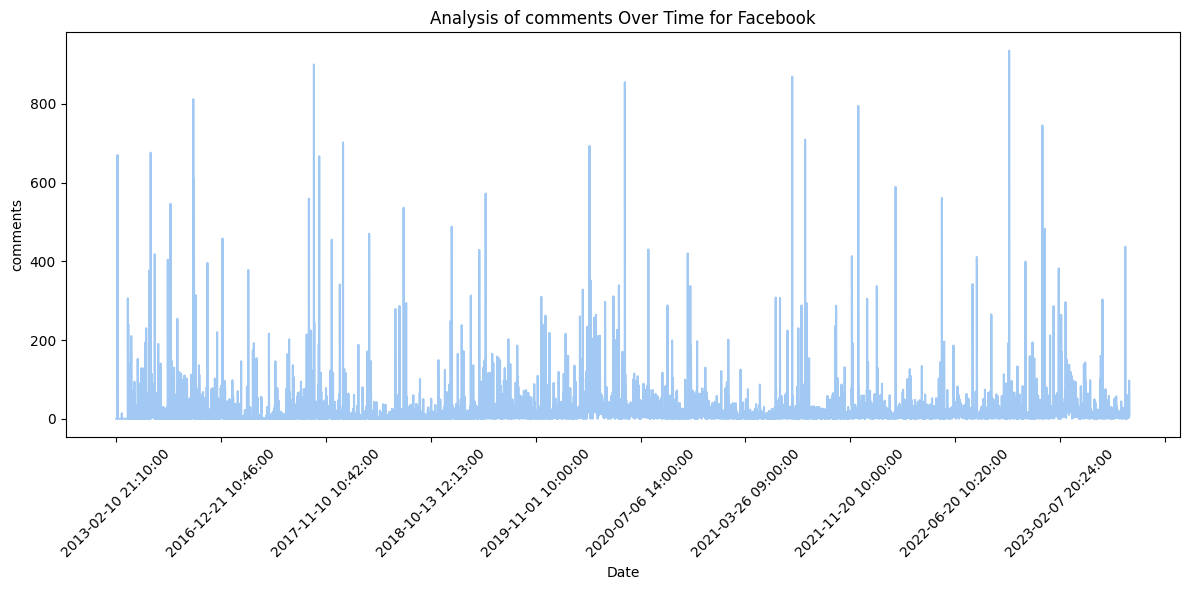

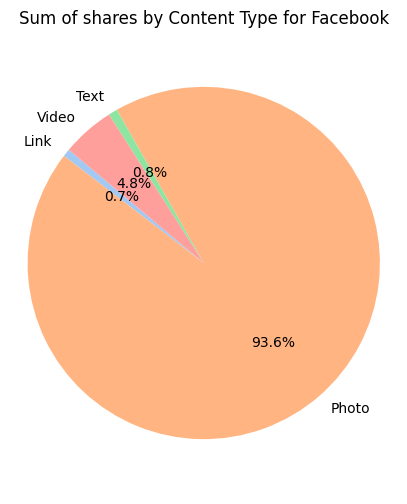

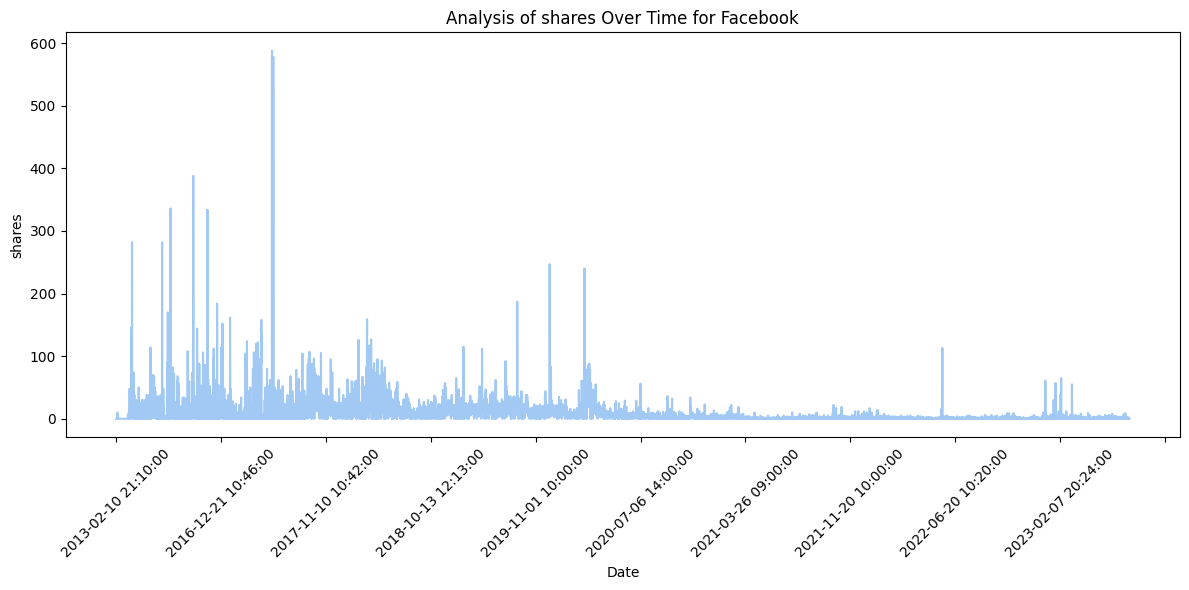

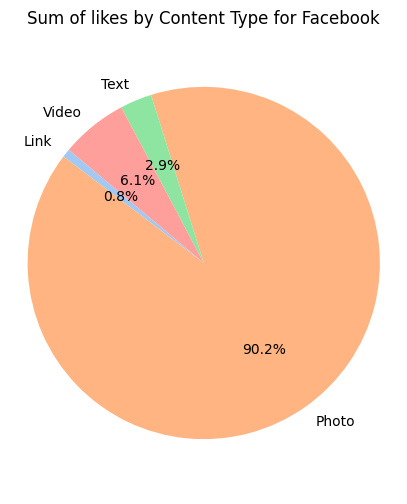

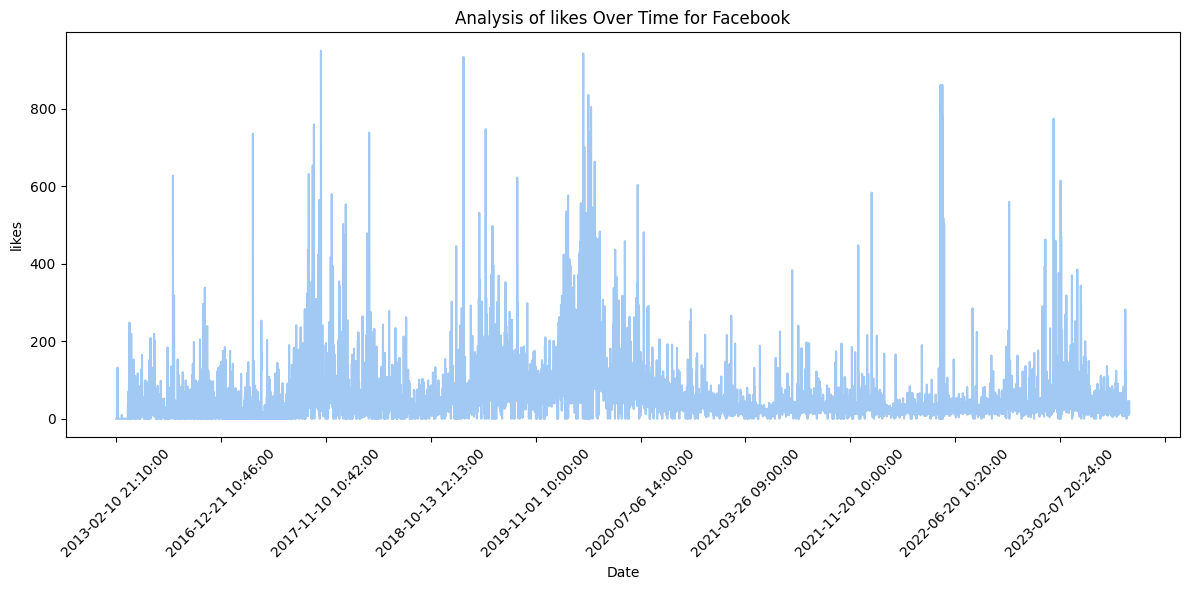

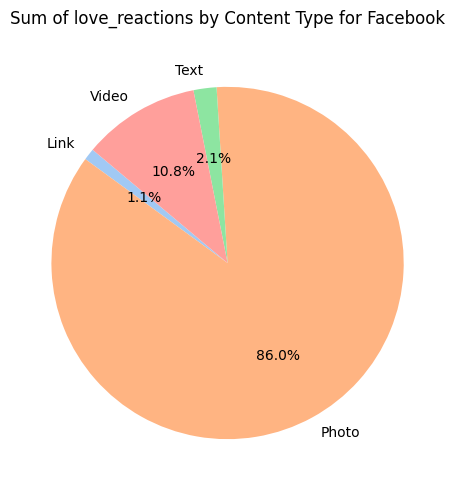

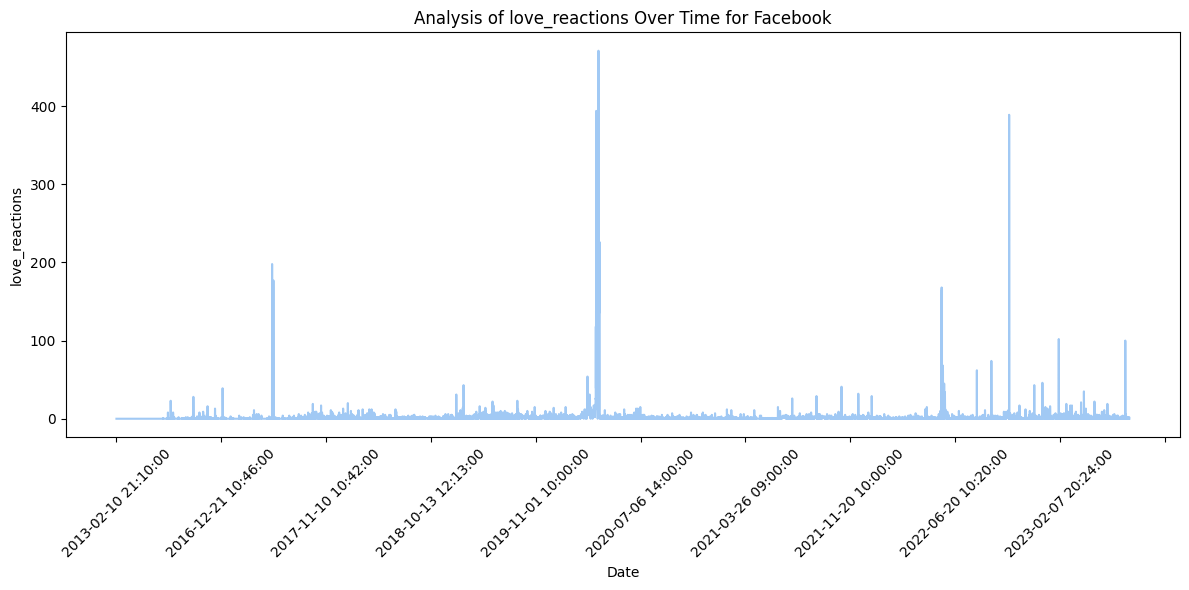

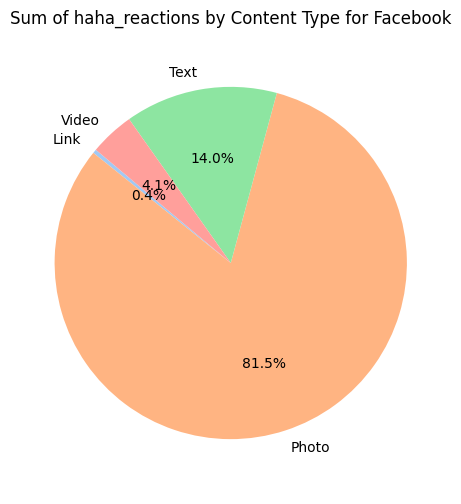

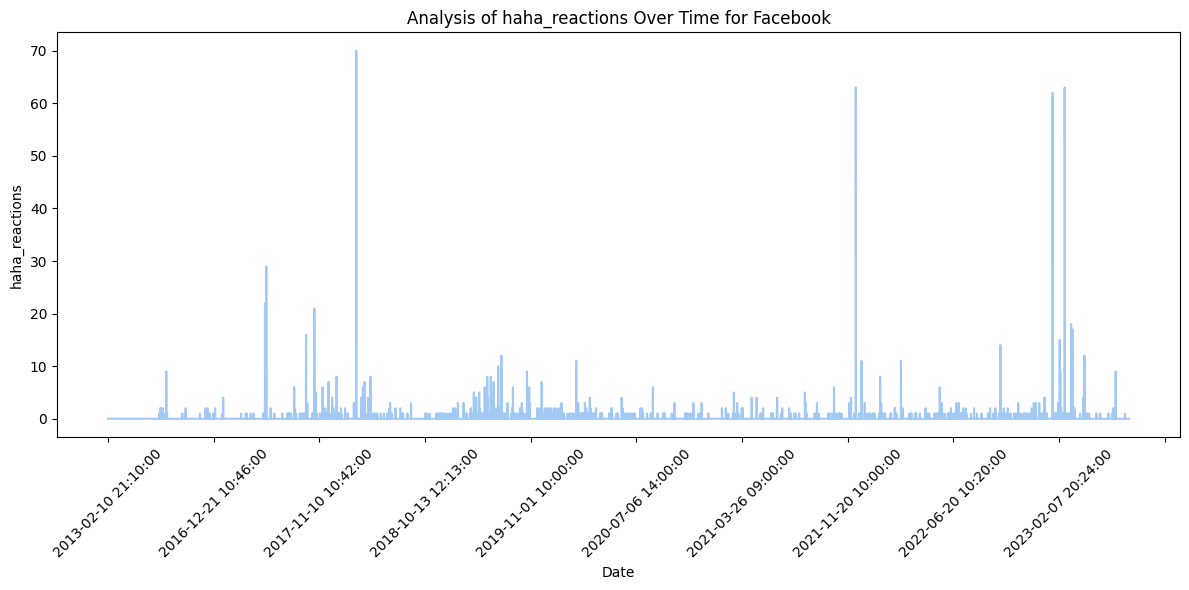

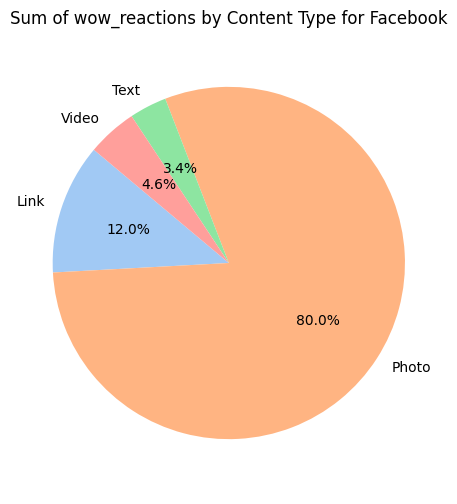

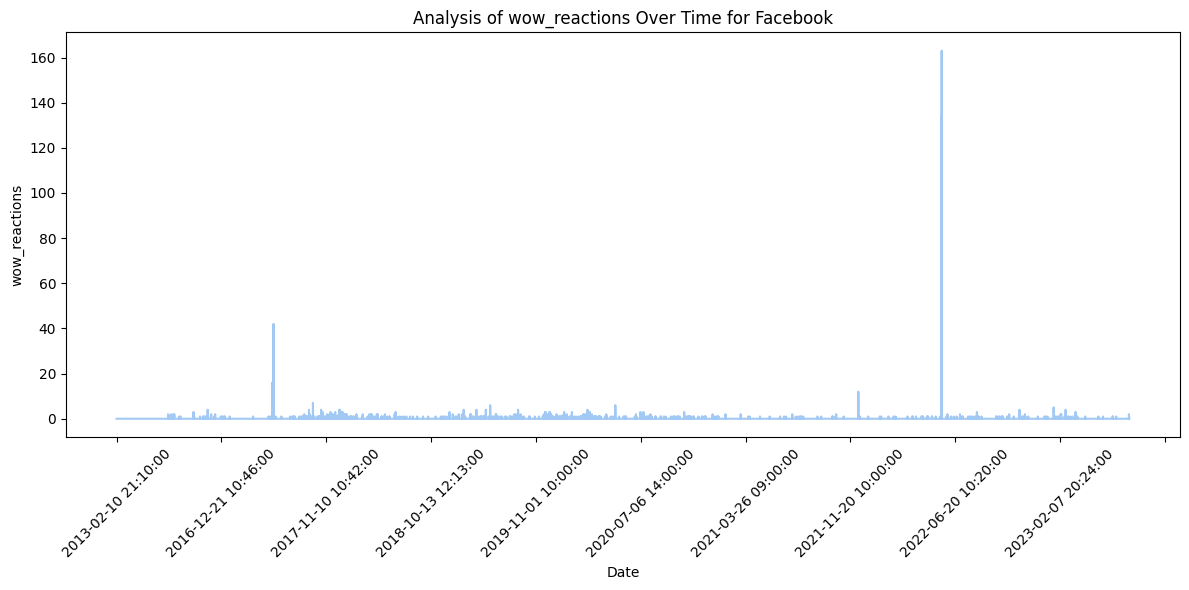

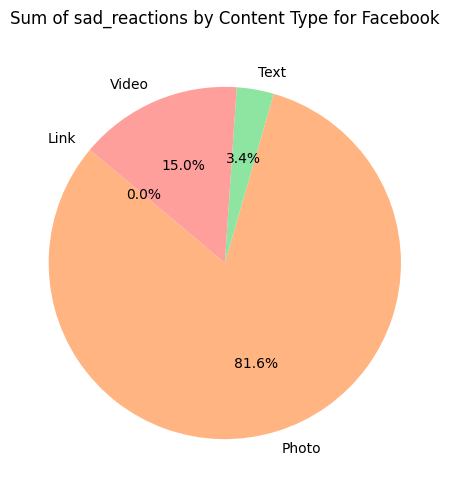

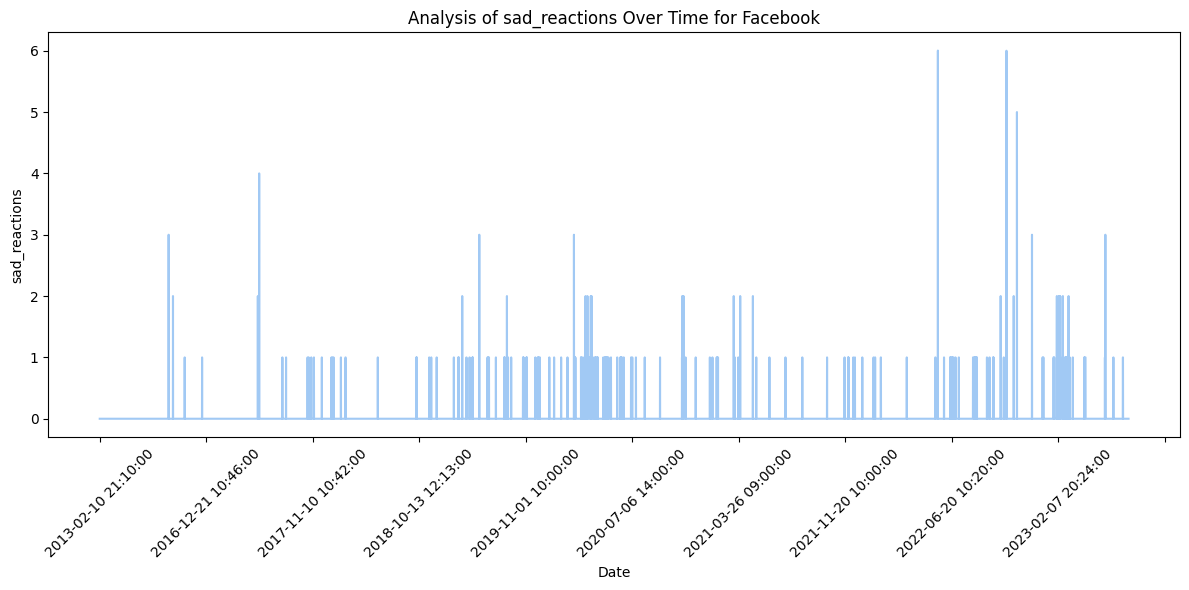

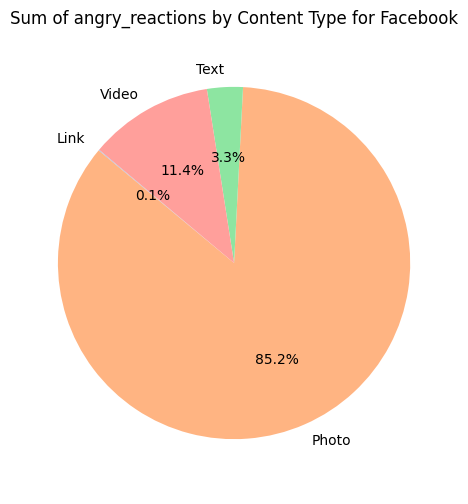

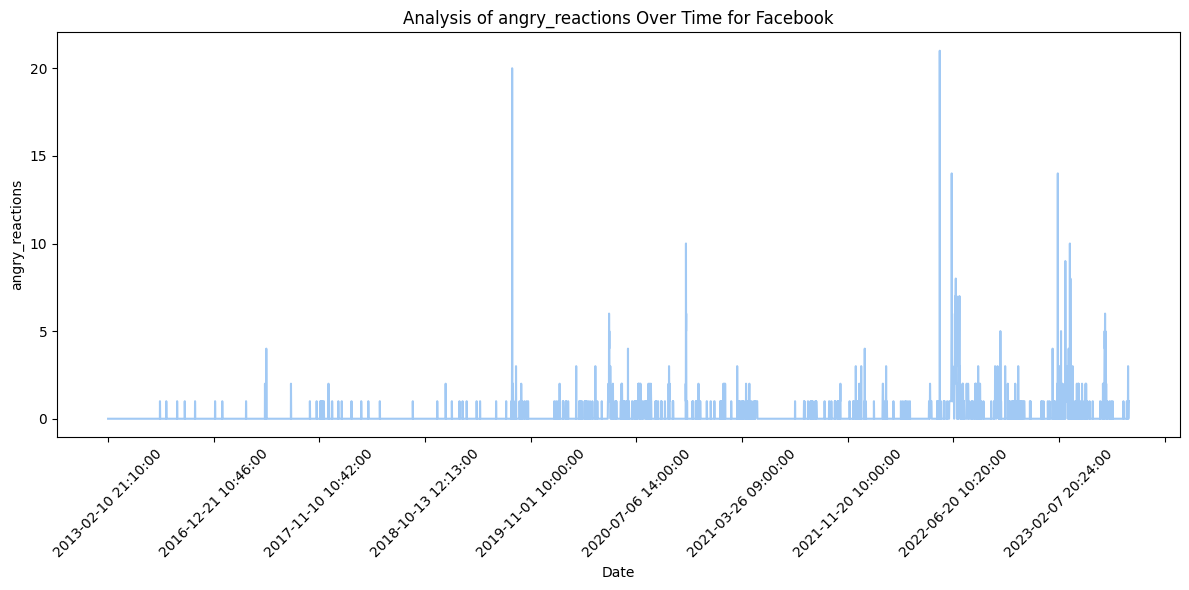

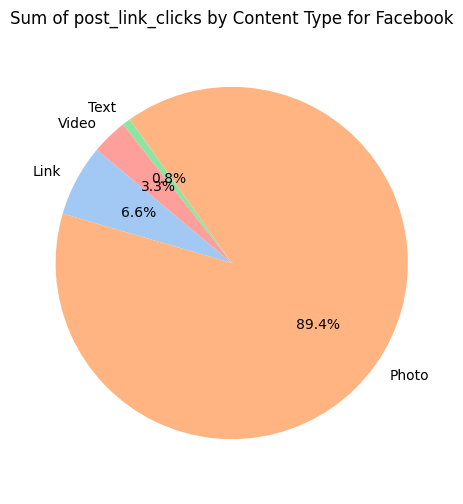

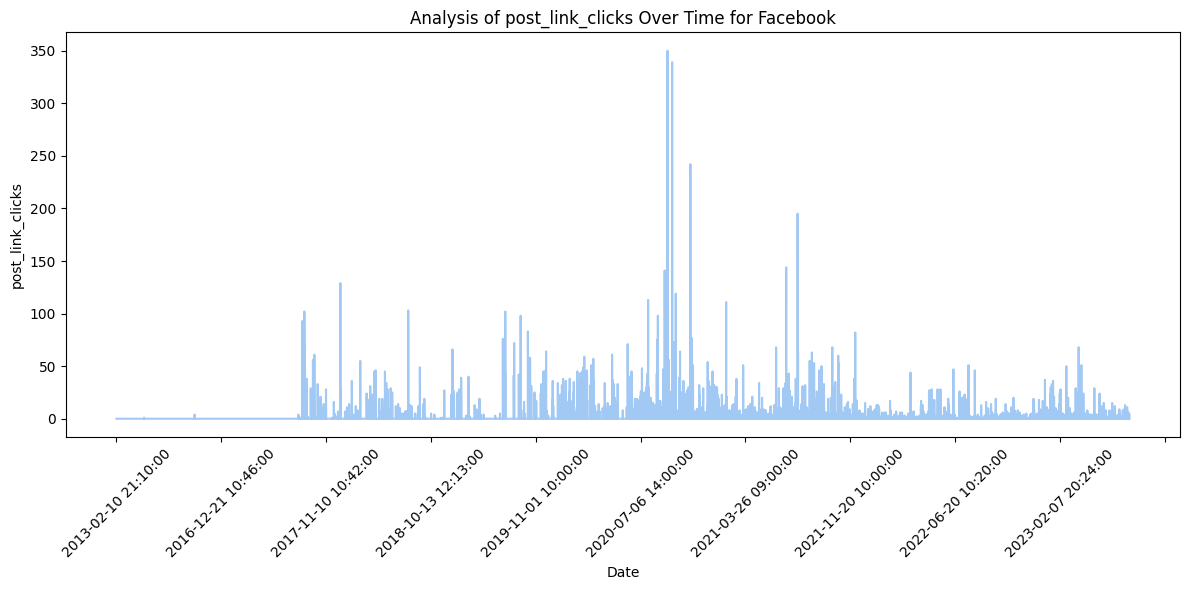

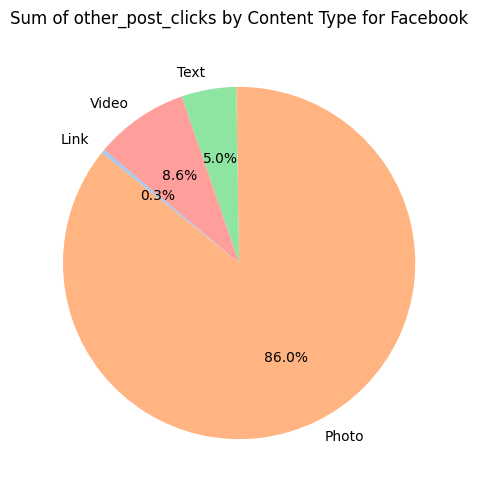

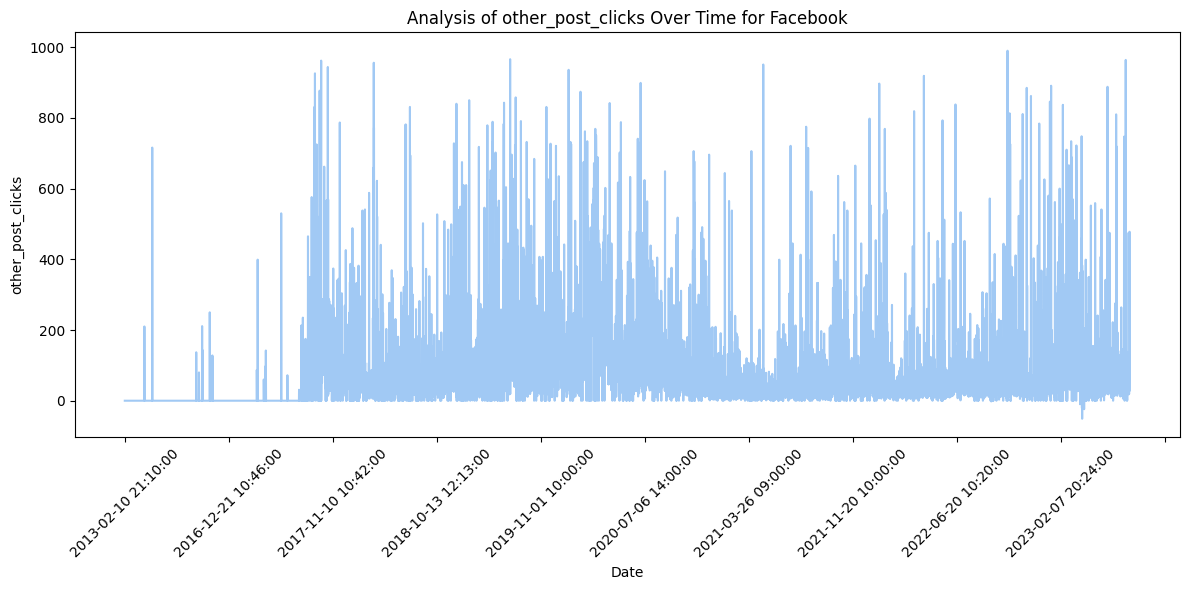

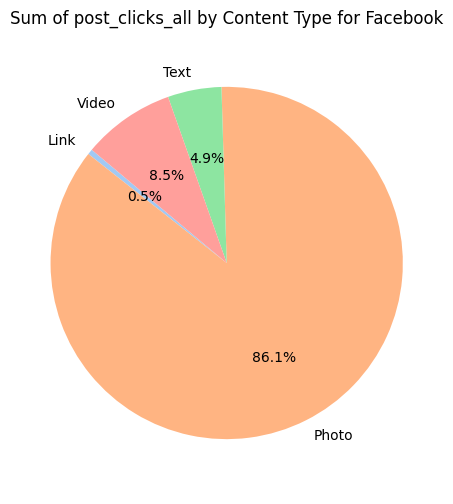

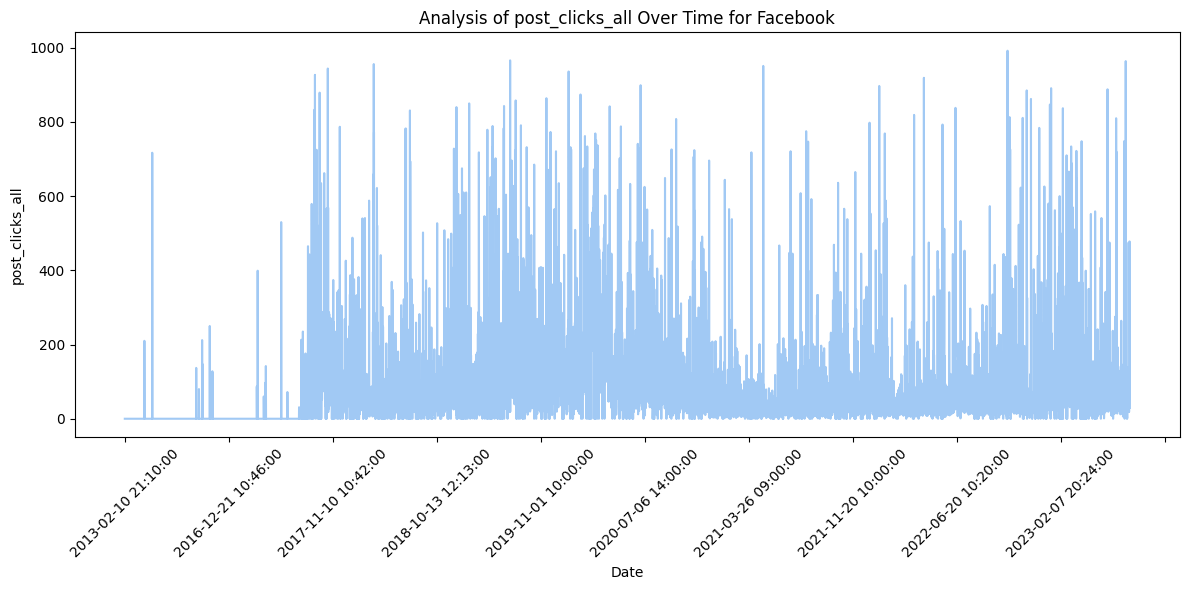

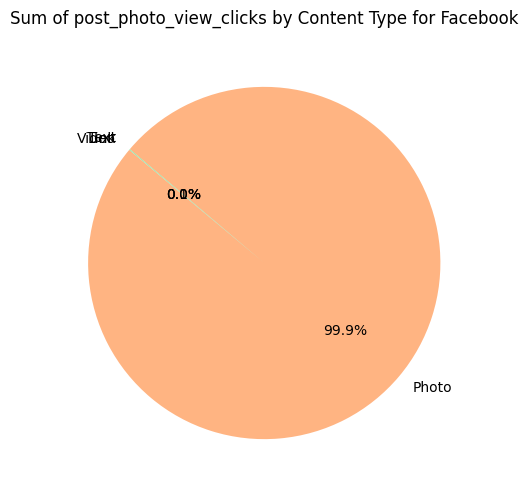

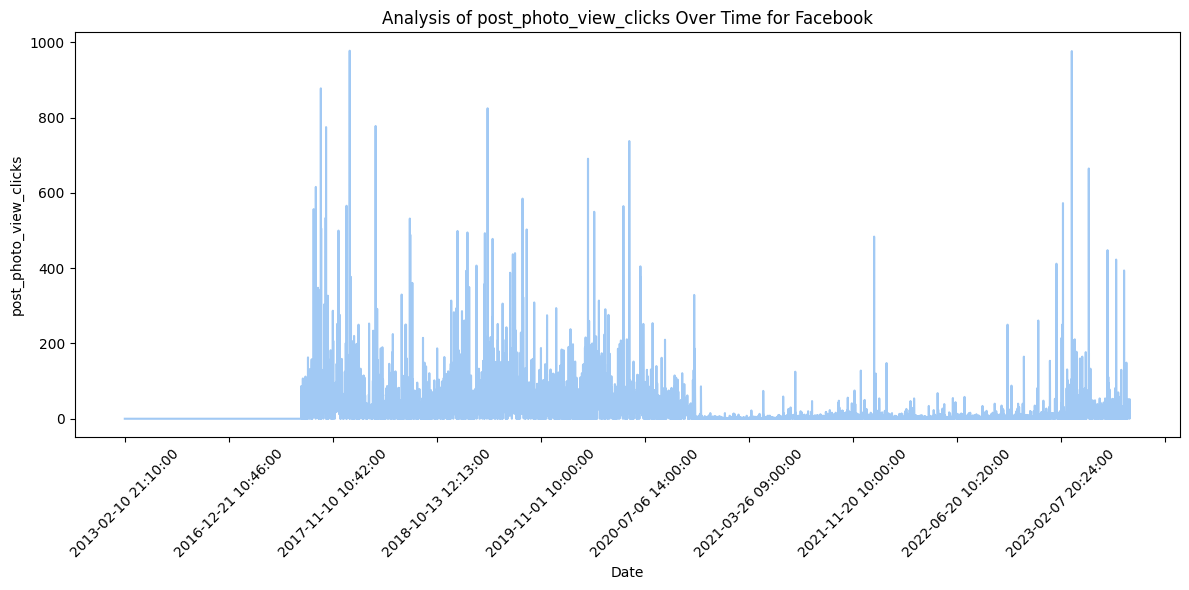

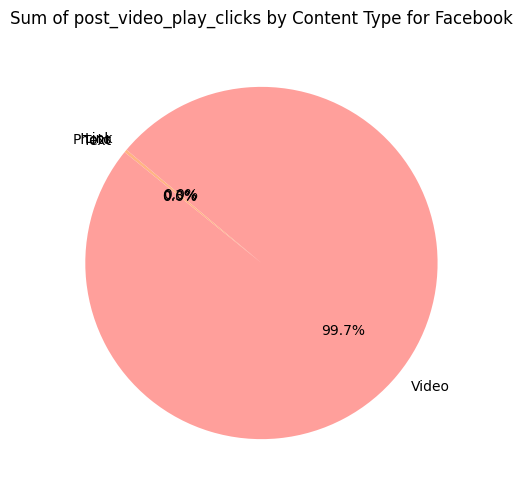

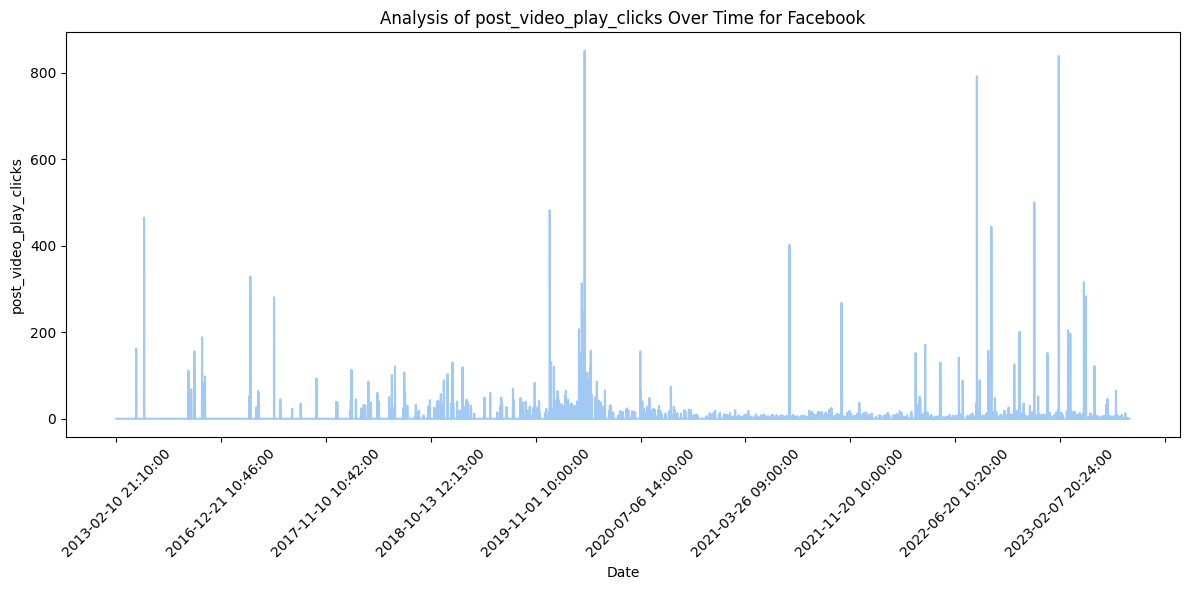

First 5 rows of the Instagram dataset:
                  date  impressions  organic_impressions  viral_impressions  \
0  2014-12-22 17:59:00          0.0                  0.0                  0   
1  2014-12-23 10:38:00          0.0                  0.0                  0   
2  2014-12-23 17:14:00          0.0                  0.0                  0   
3  2014-12-24 10:28:00          0.0                  0.0                  0   
4  2014-12-24 17:37:00          0.0                  0.0                  0   

   non_viral_impressions  paid_impressions  engagement_rate_per_impression  \
0                      0                 0                             0.0   
1                      0                 0                             0.0   
2                      0                 0                             0.0   
3                      0                 0                             0.0   
4                      0                 0                             0.0   

   engagement_rat

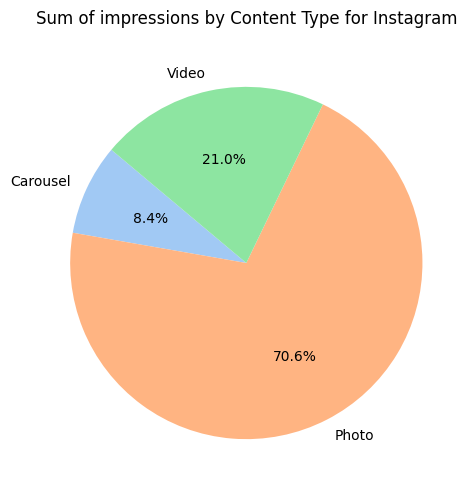

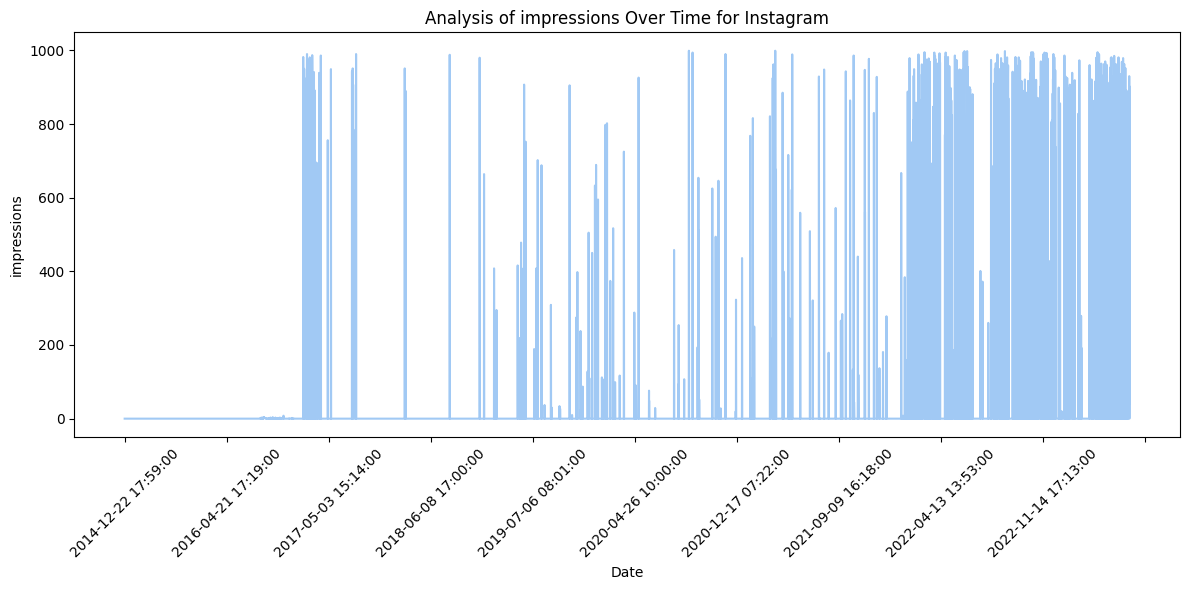

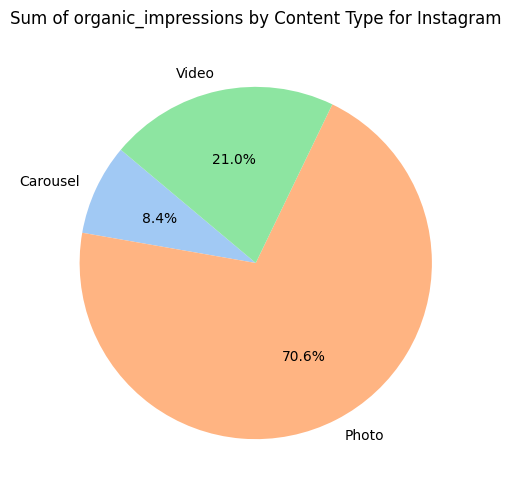

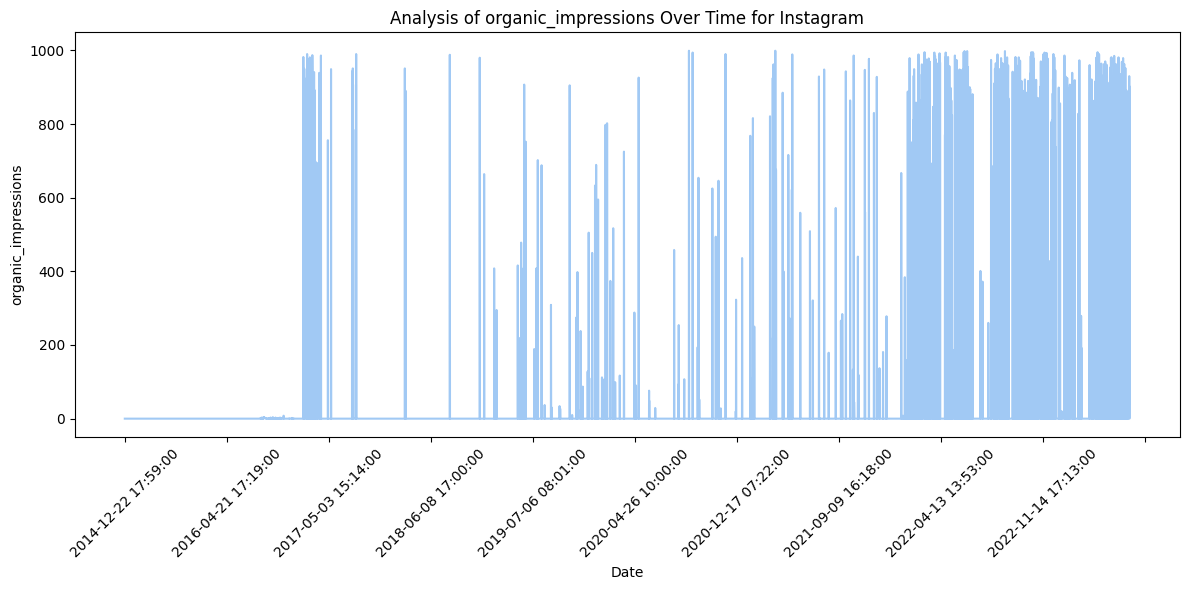

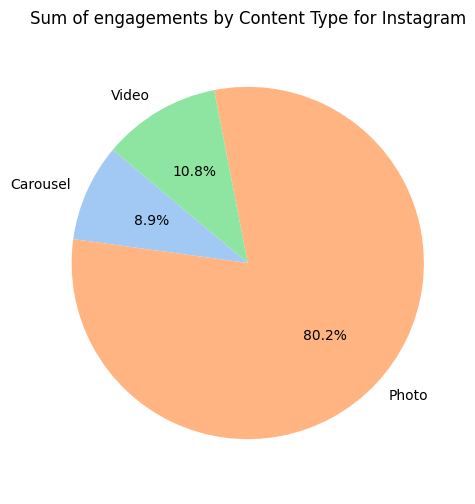

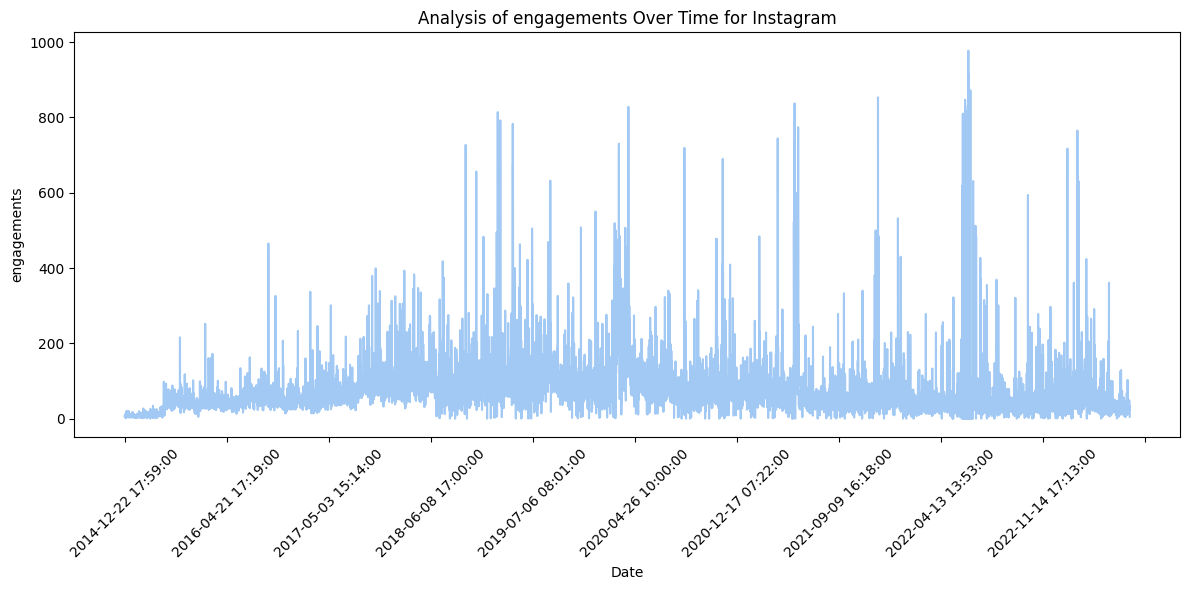

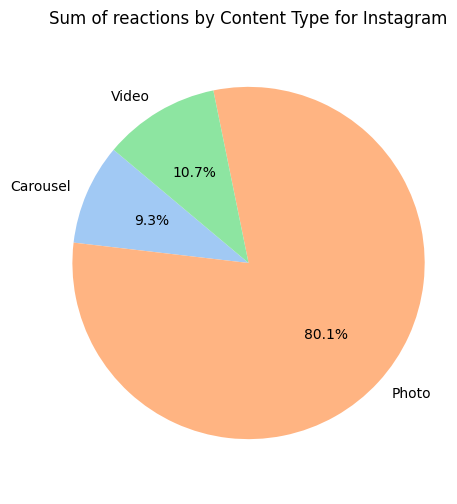

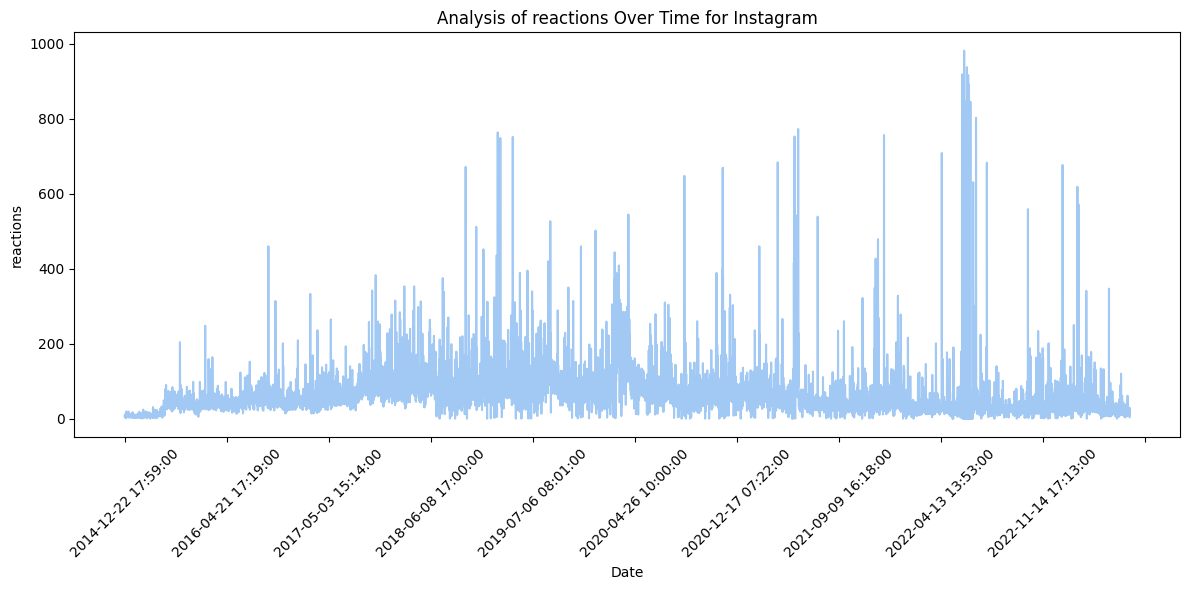

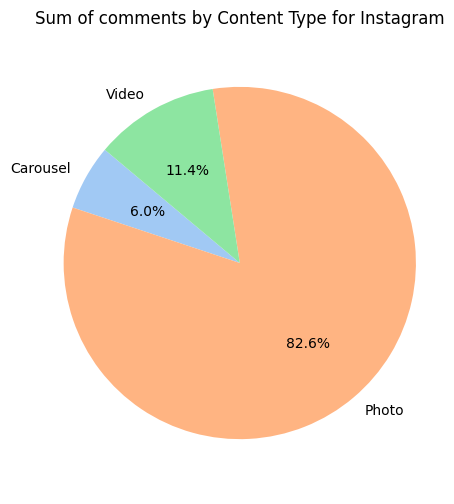

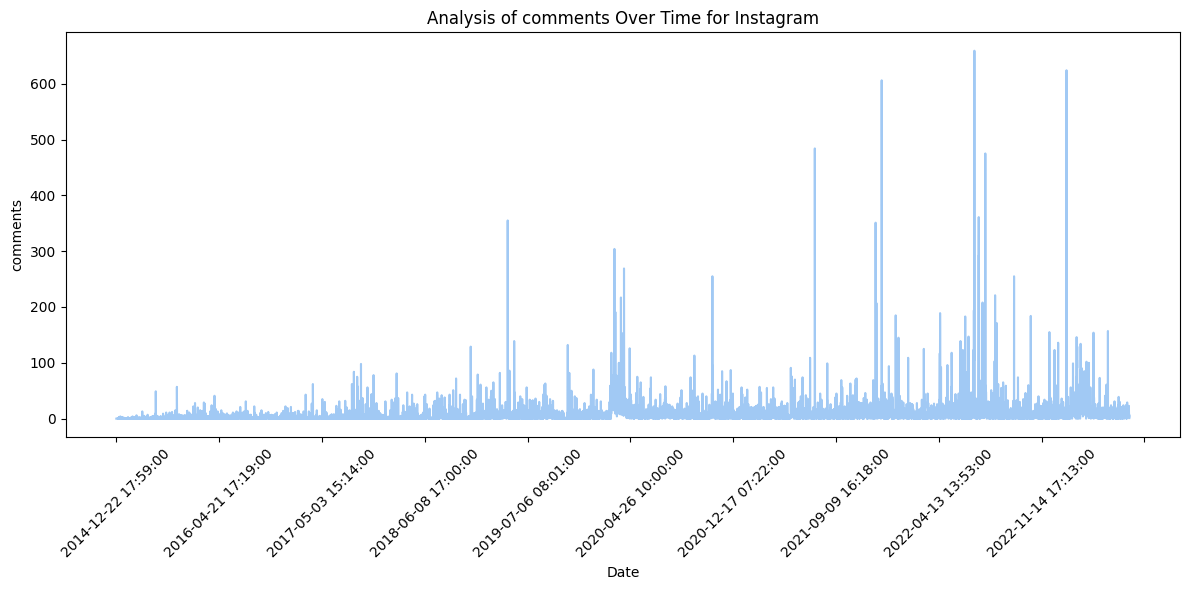

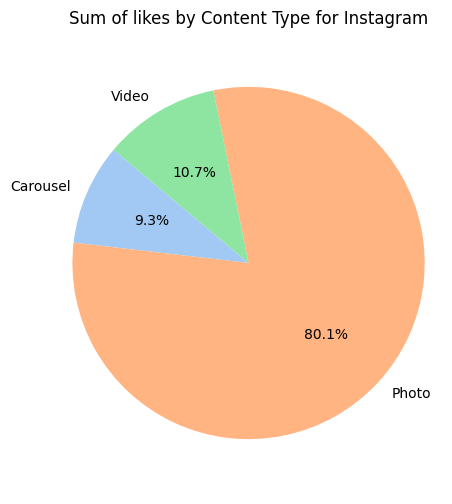

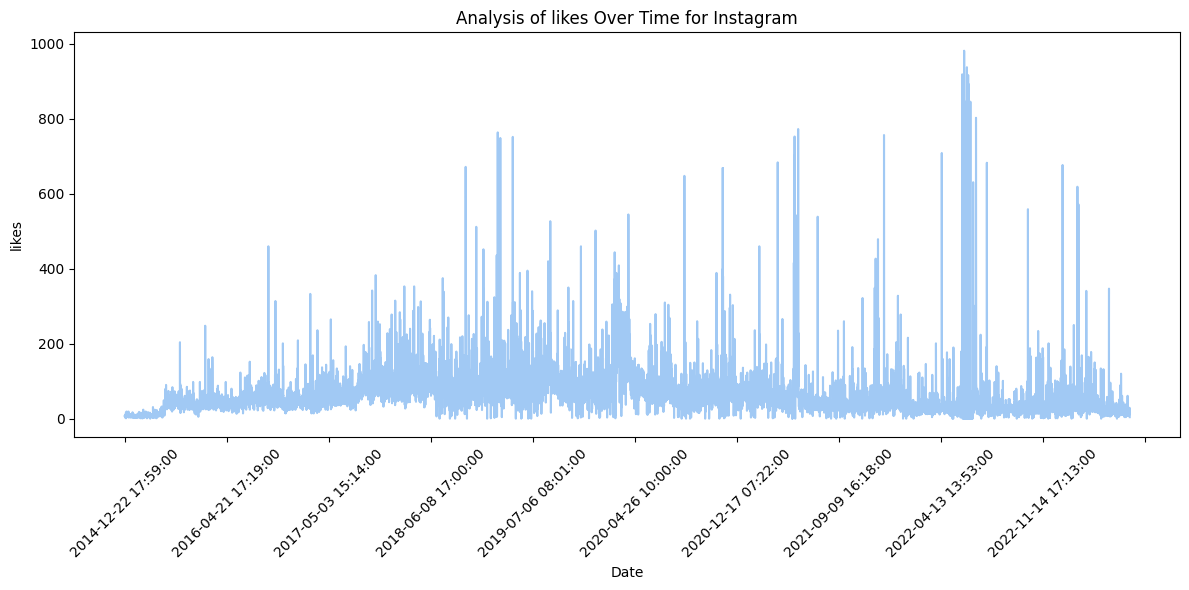

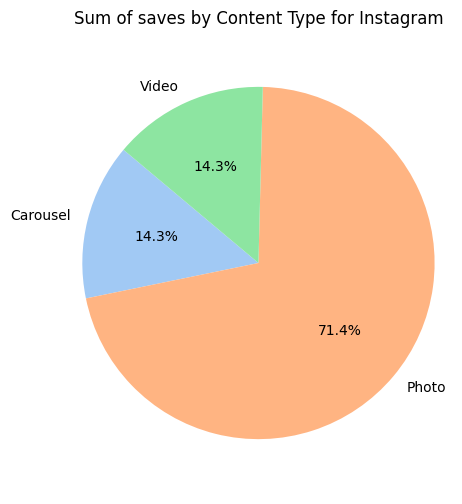

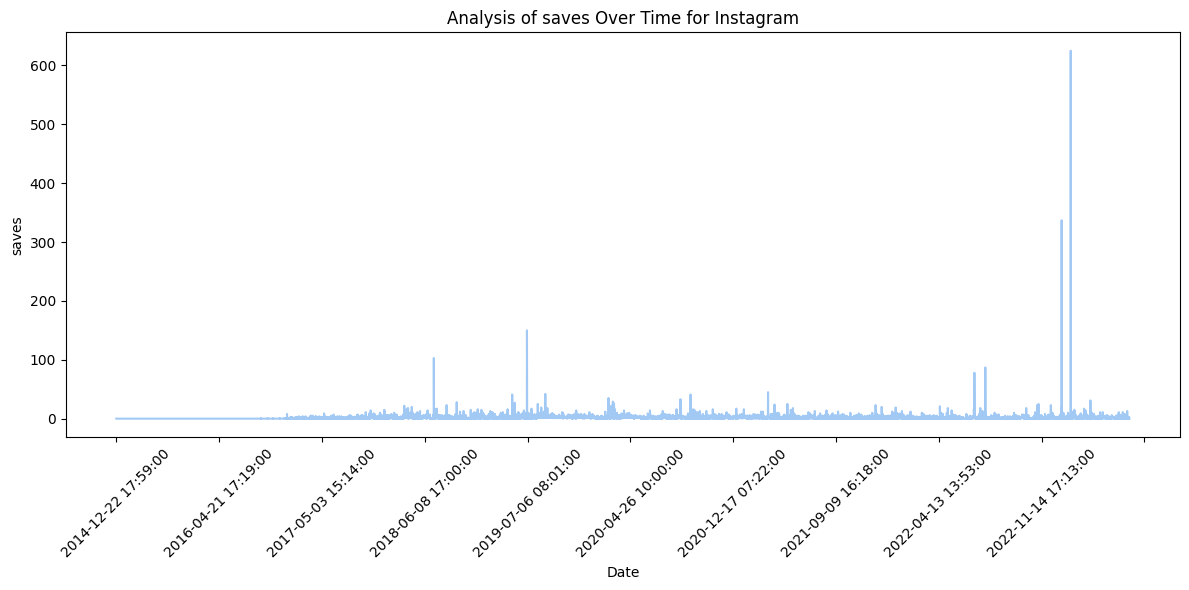

First 5 rows of the LinkedIn dataset:
                  date  impressions  organic_impressions  viral_impressions  \
0  2014-05-05 10:57:00          0.0                  0.0                  0   
1  2014-05-06 13:40:00          0.0                  0.0                  0   
2  2014-05-07 13:28:00          0.0                  0.0                  0   
3  2014-05-08 14:15:00          0.0                  0.0                  0   
4  2014-05-09 11:24:00          0.0                  0.0                  0   

   non_viral_impressions  paid_impressions  engagement_rate_per_impression  \
0                      0                 0                             0.0   
1                      0                 0                             0.0   
2                      0                 0                             0.0   
3                      0                 0                             0.0   
4                      0                 0                             0.0   

   engagement_rate

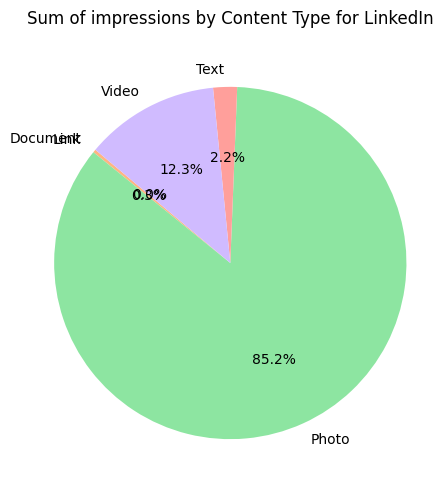

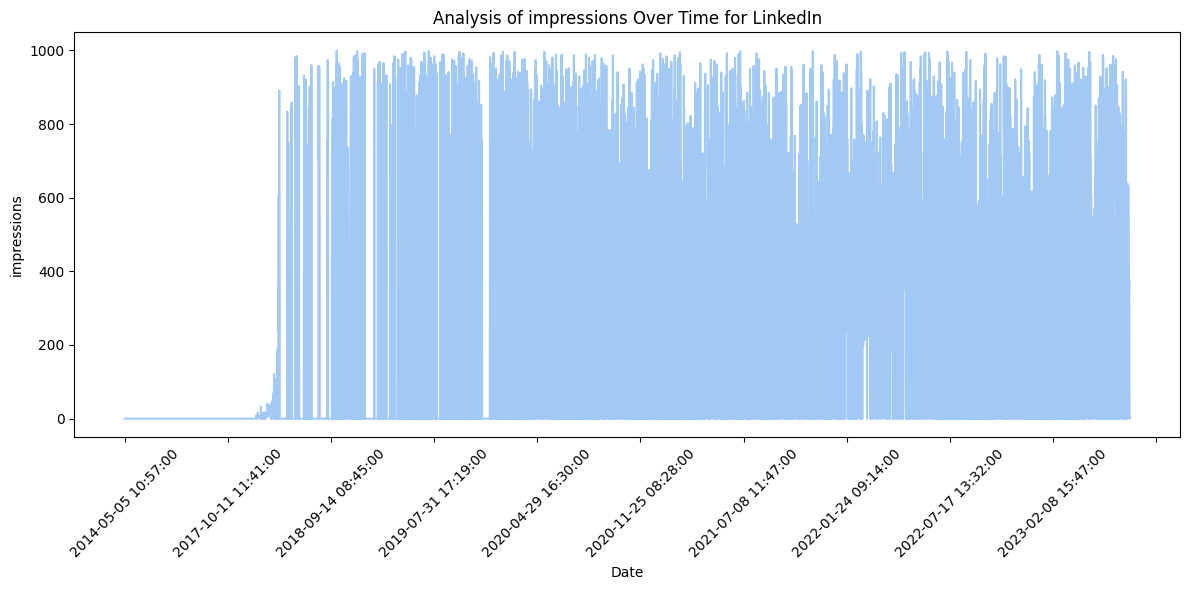

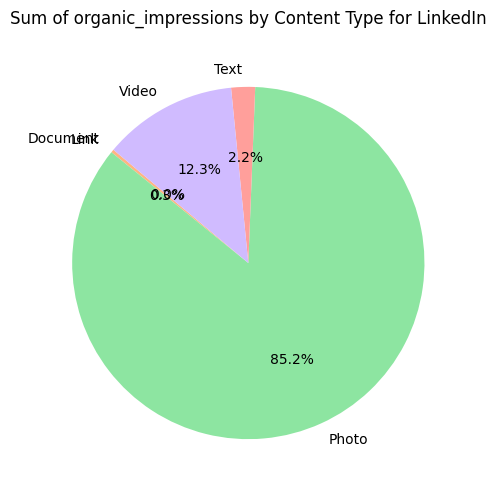

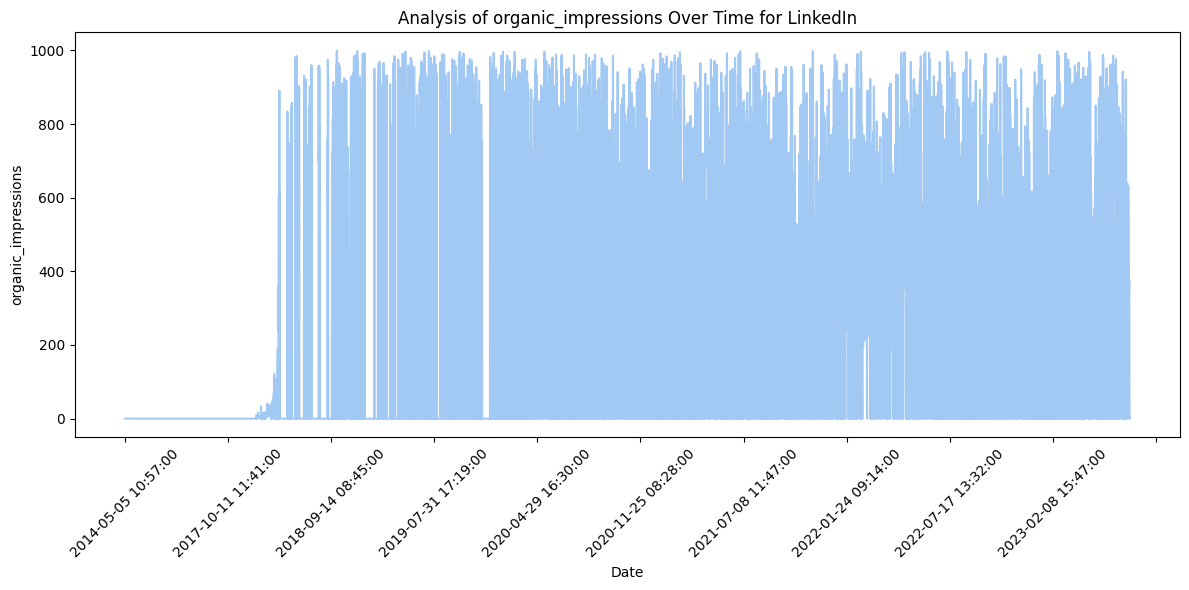

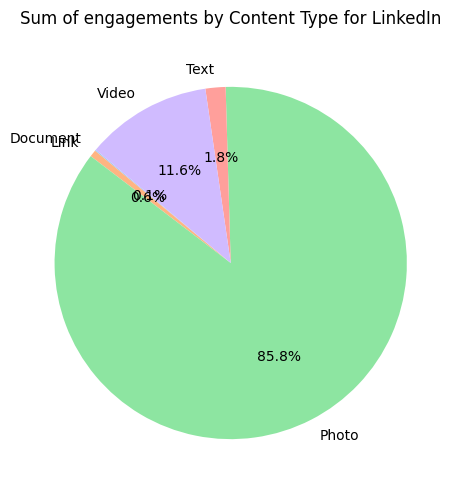

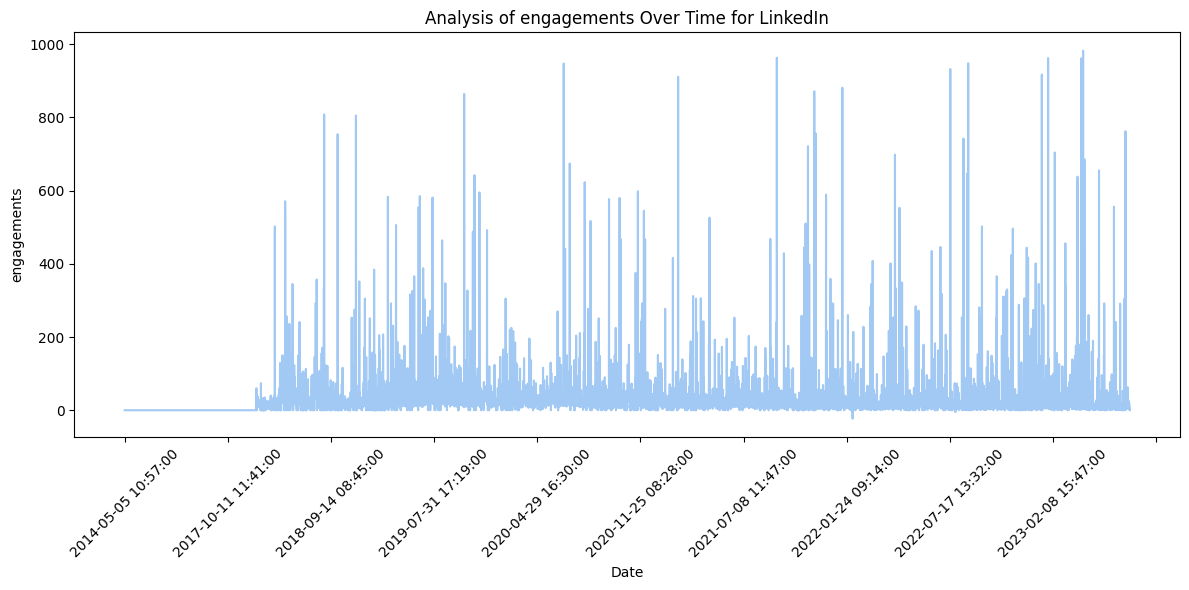

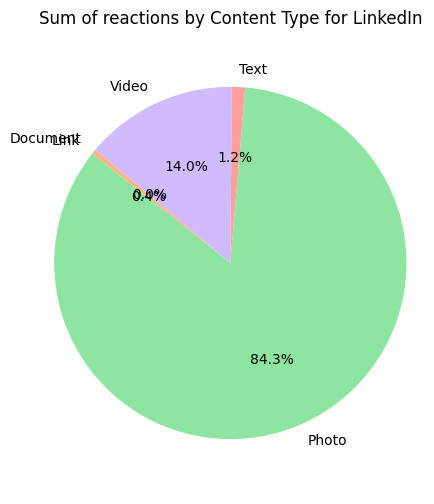

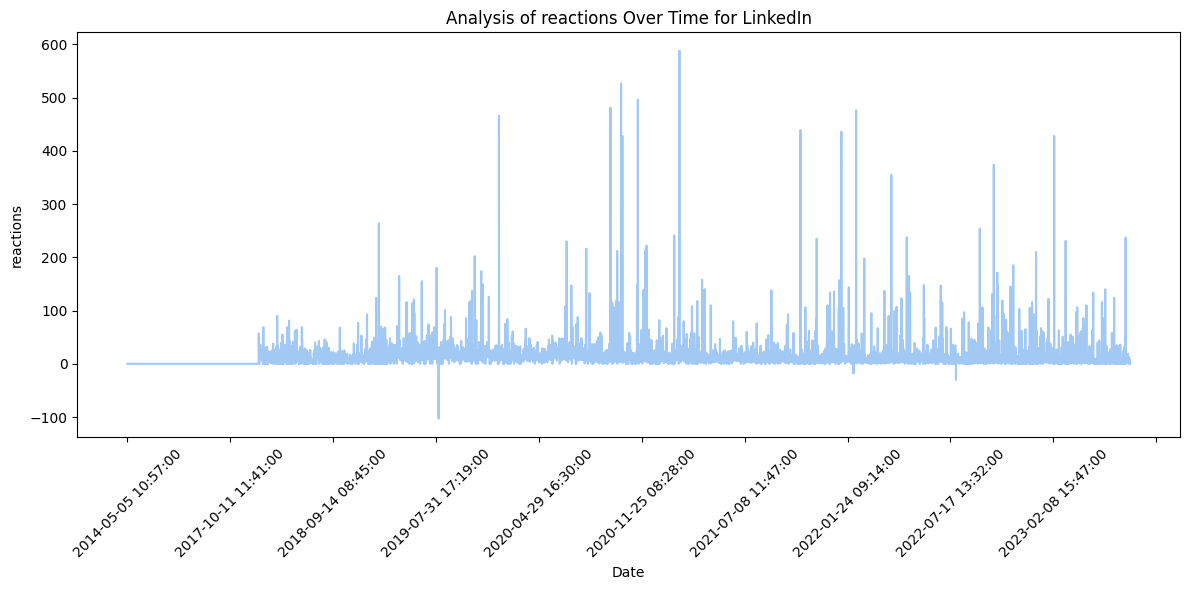

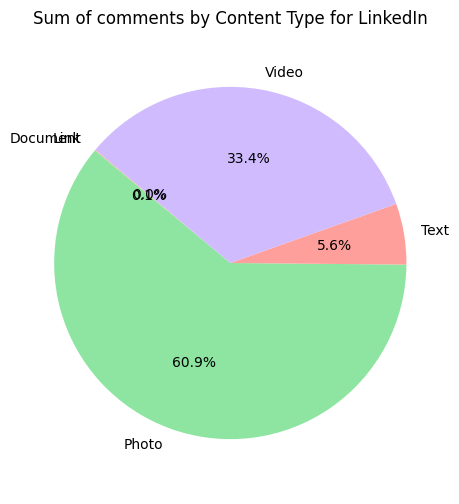

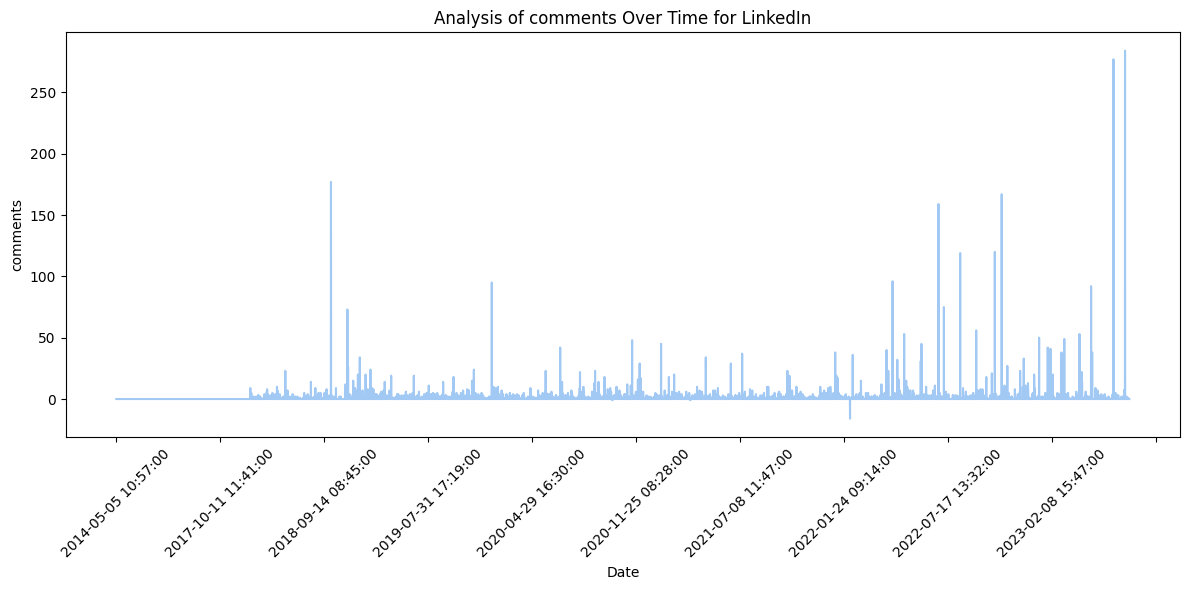

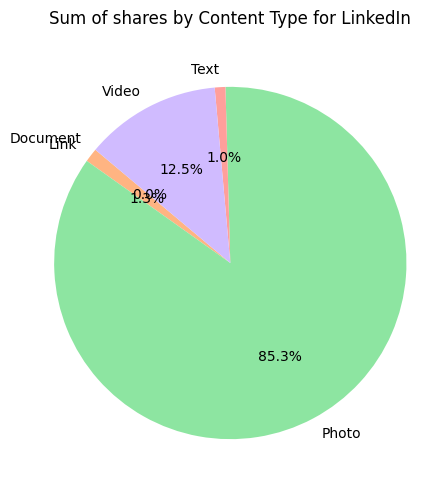

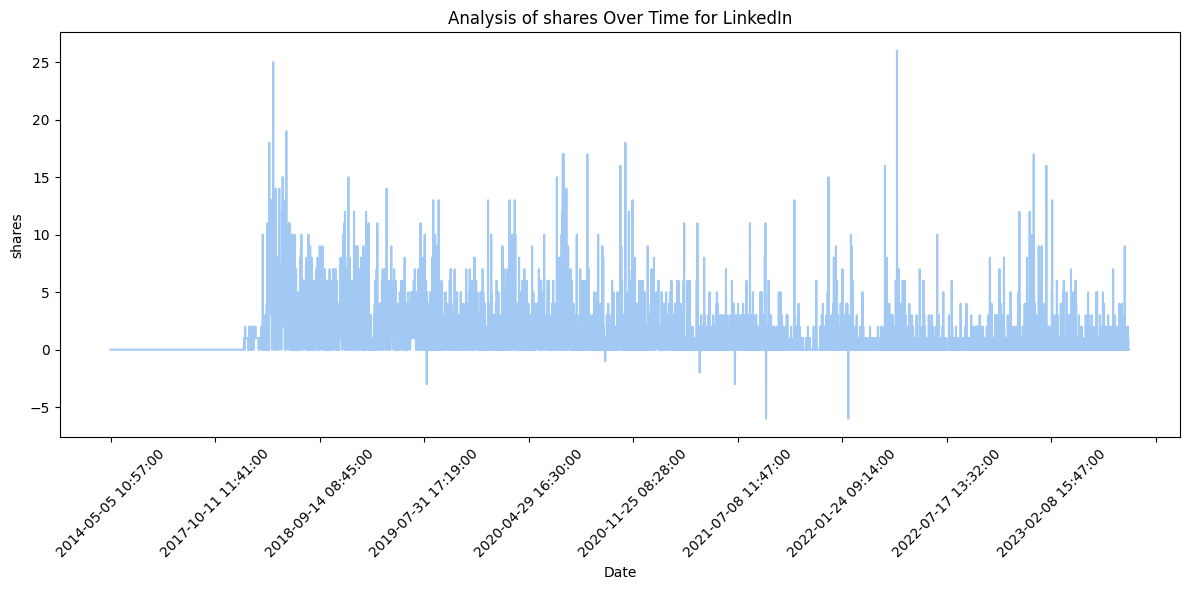

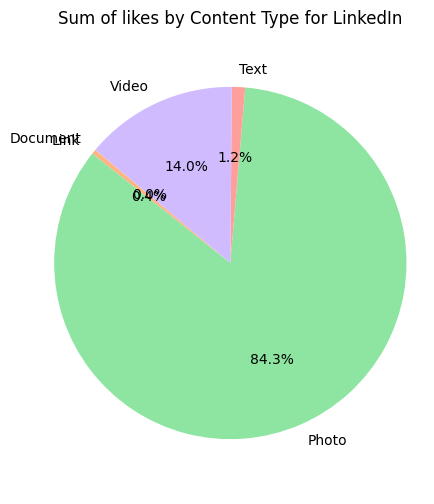

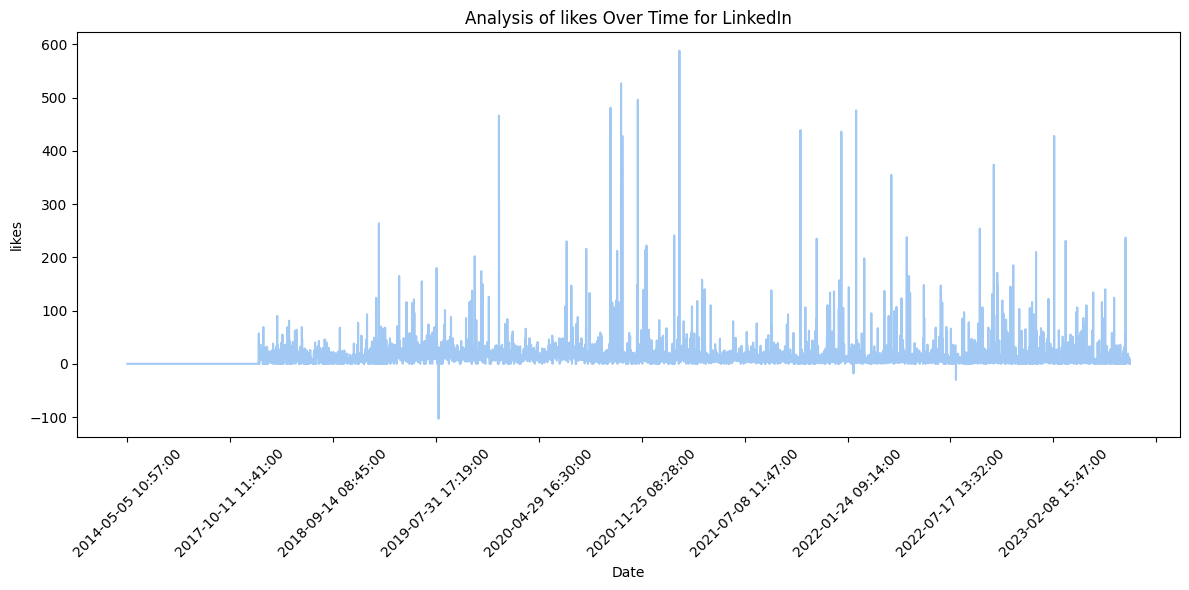

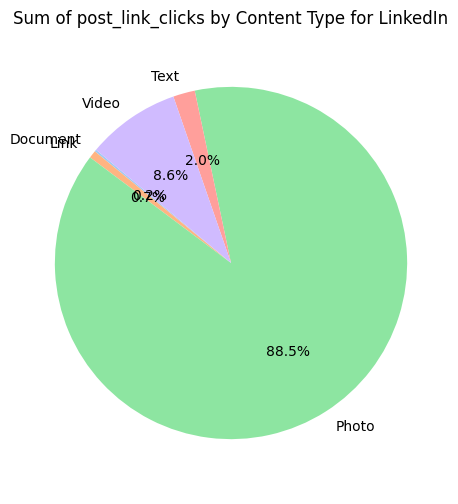

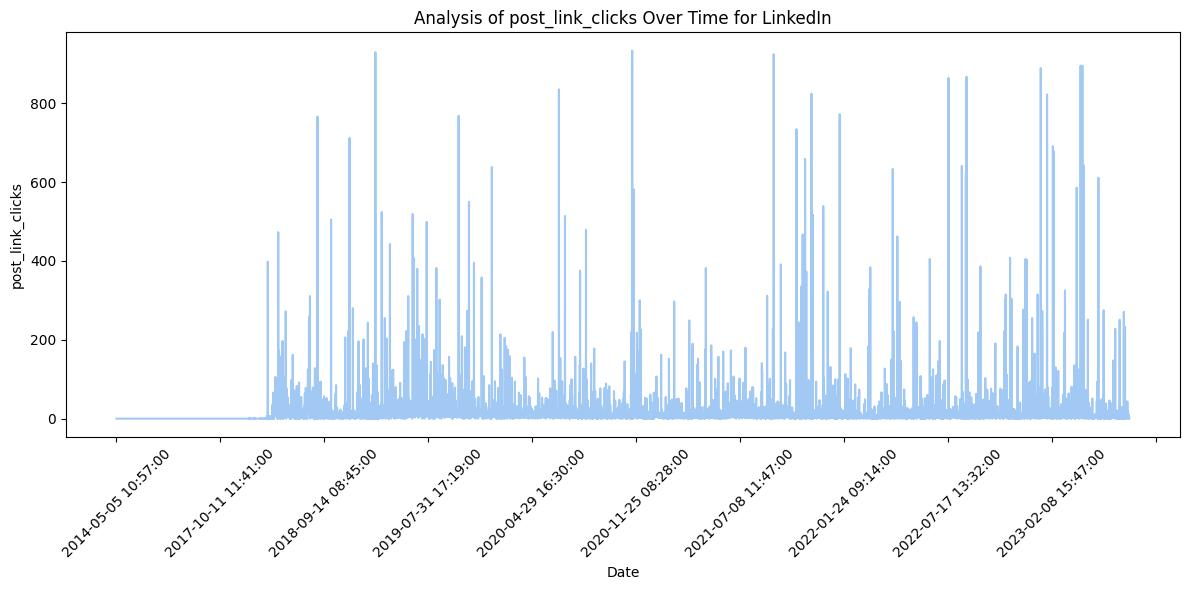

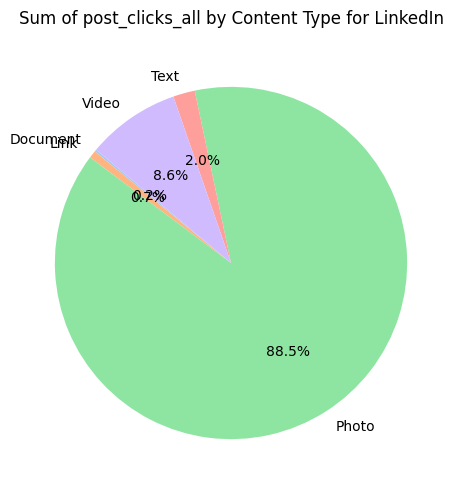

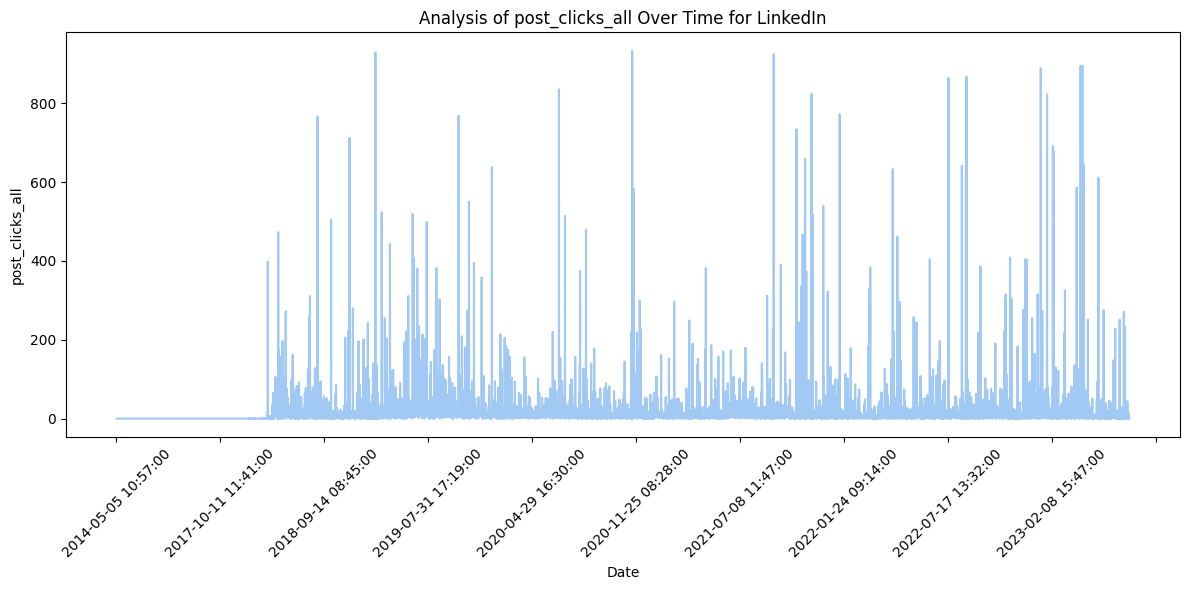

First 5 rows of the Twitter dataset:
                  date  impressions  organic_impressions  viral_impressions  \
0  2013-02-17 09:01:00          0.0                  0.0                  0   
1  2013-02-18 09:01:00          0.0                  0.0                  0   
2  2013-02-18 11:18:00          0.0                  0.0                  0   
3  2013-02-18 19:13:00          0.0                  0.0                  0   
4  2013-02-18 19:39:00          0.0                  0.0                  0   

   non_viral_impressions  paid_impressions  engagement_rate_per_impression  \
0                      0                 0                             0.0   
1                      0                 0                             0.0   
2                      0                 0                             0.0   
3                      0                 0                             0.0   
4                      0                 0                             0.0   

   engagement_rate_

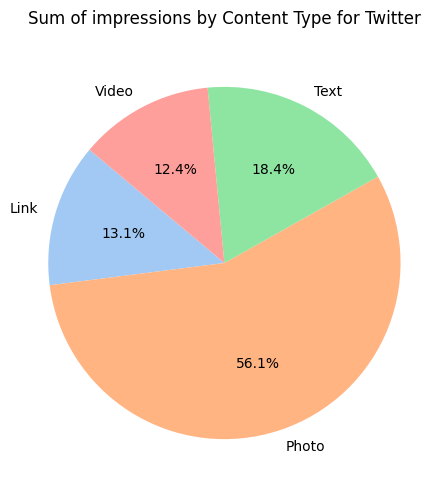

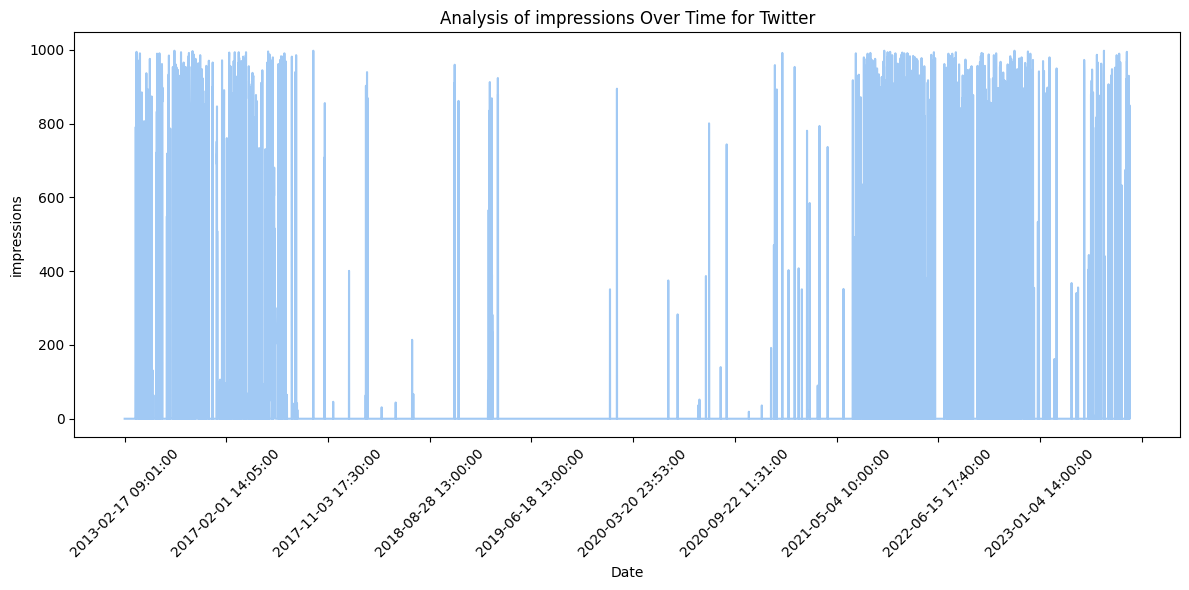

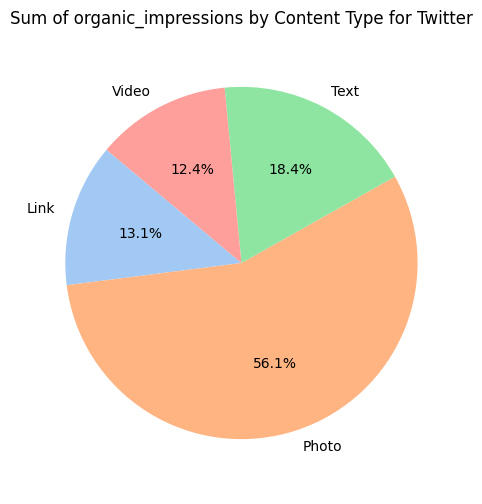

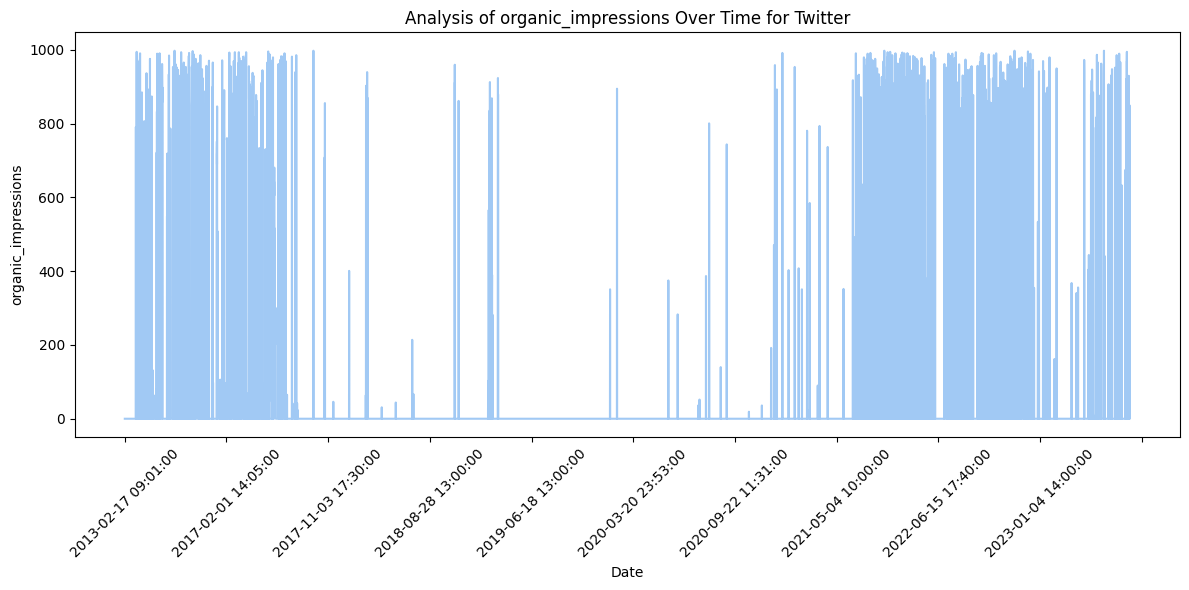

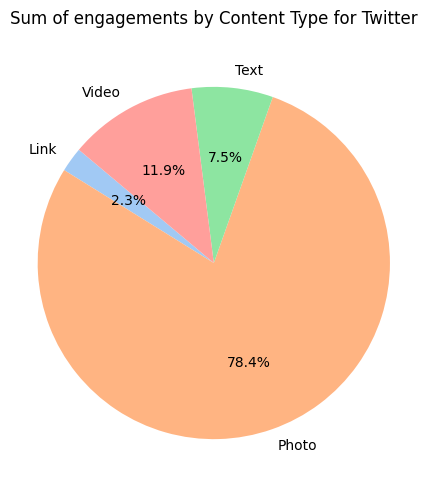

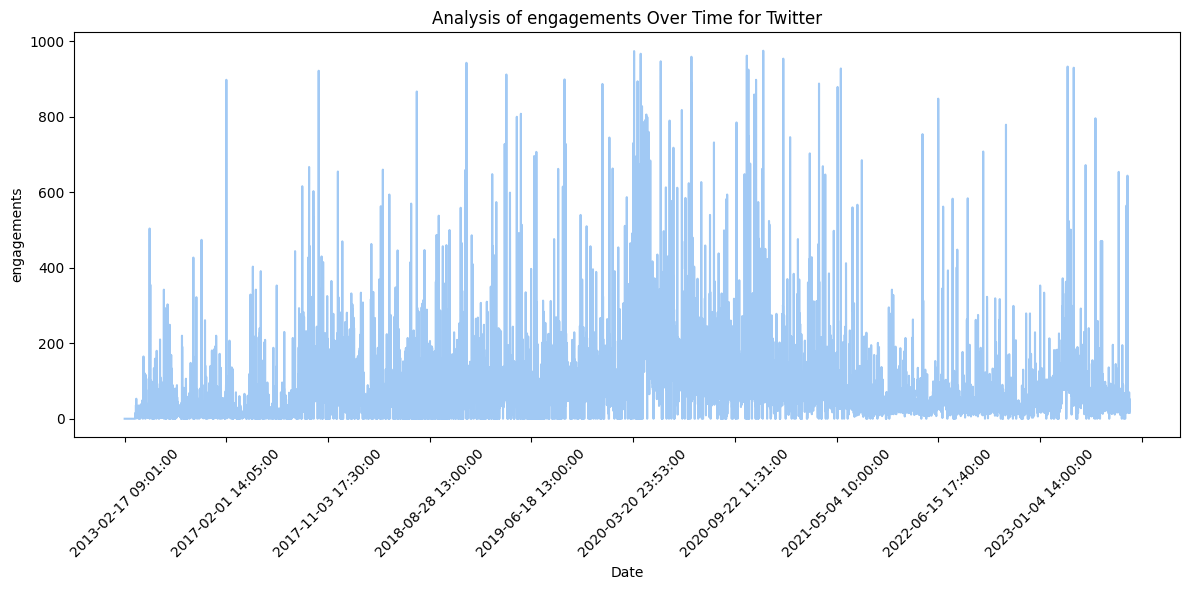

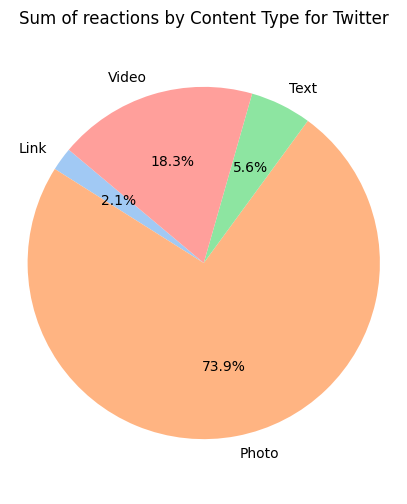

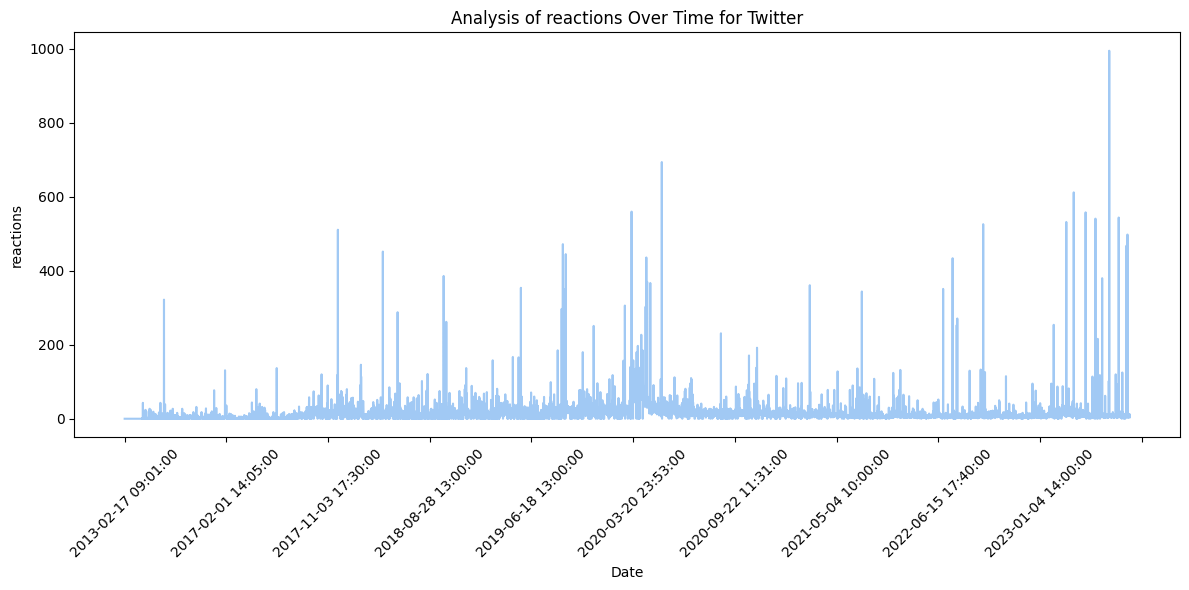

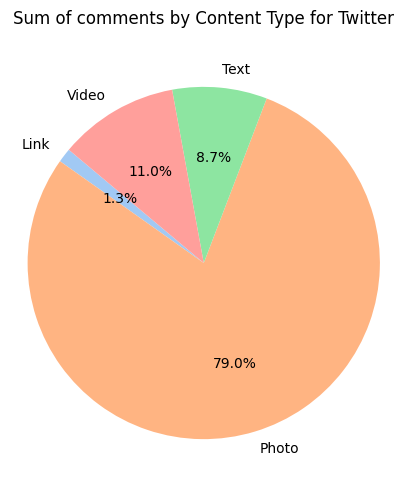

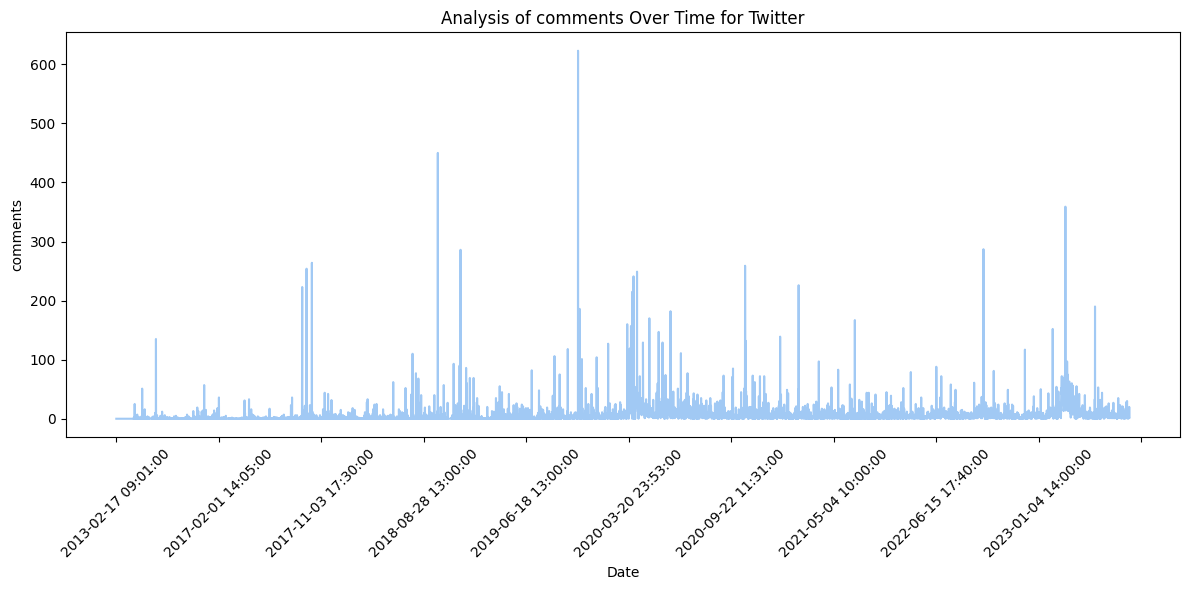

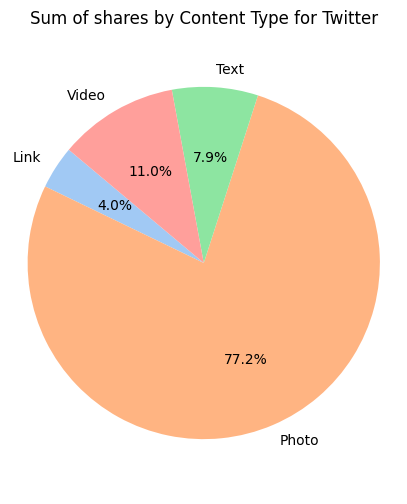

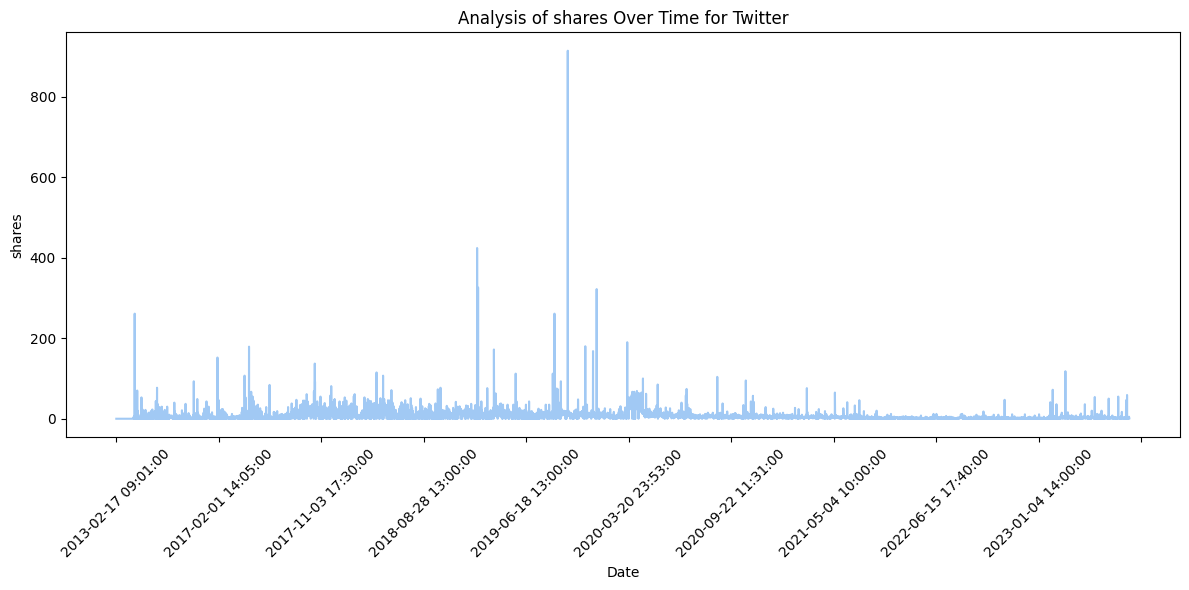

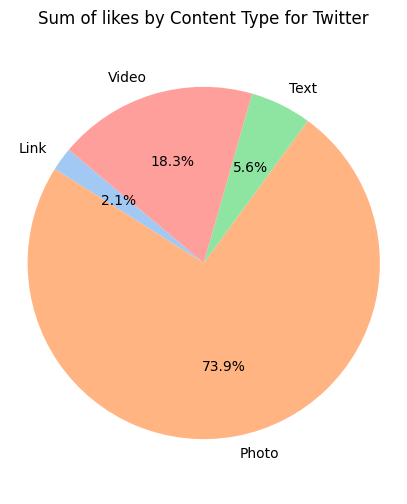

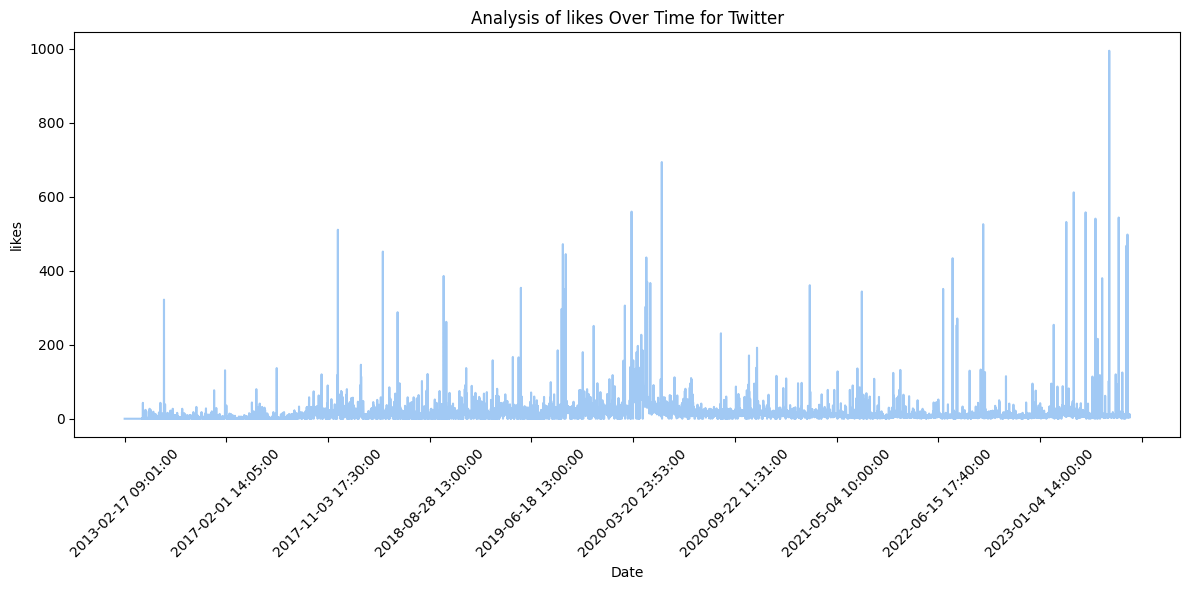

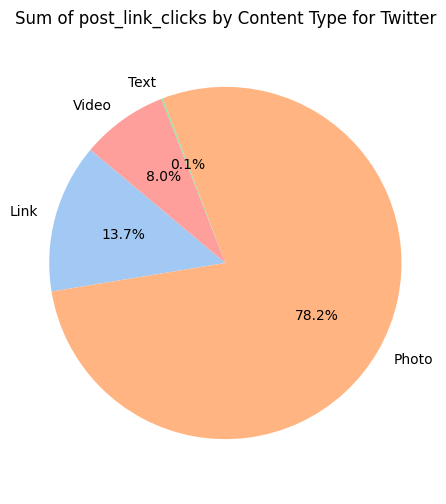

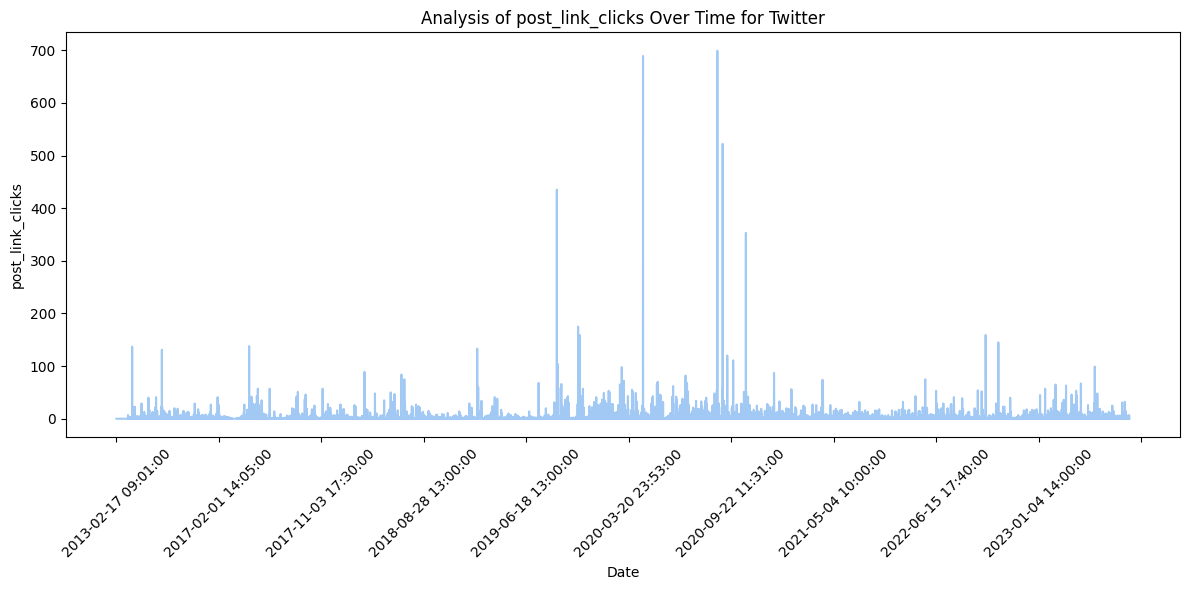

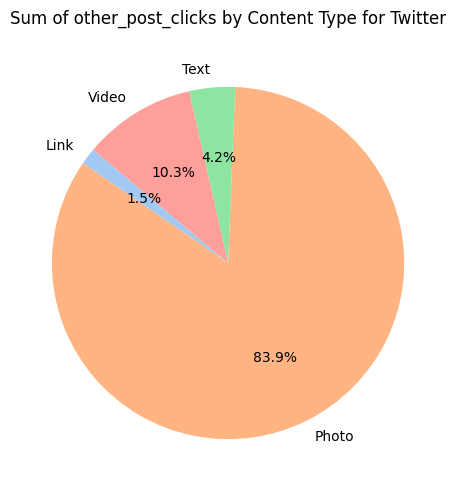

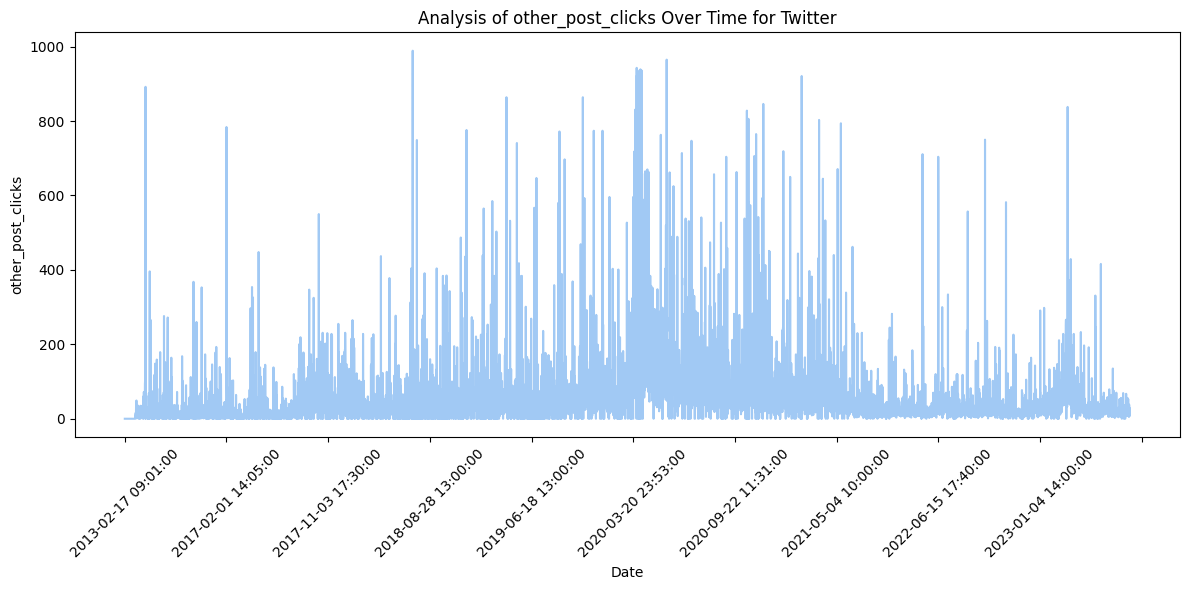

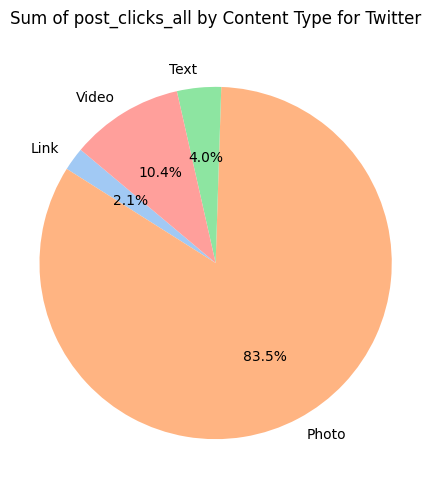

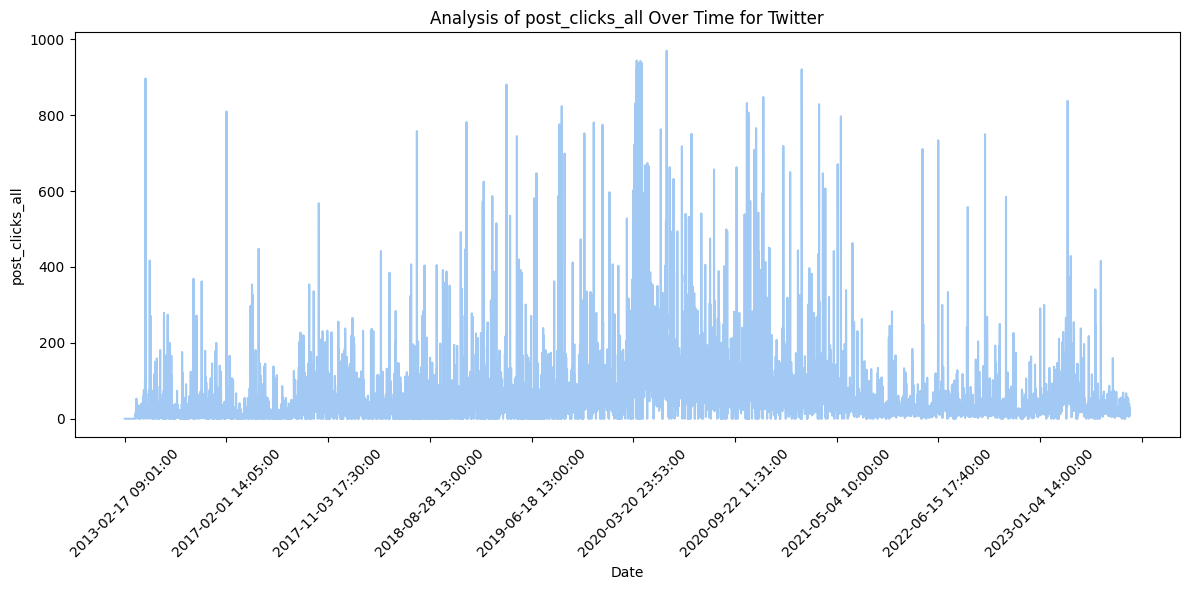

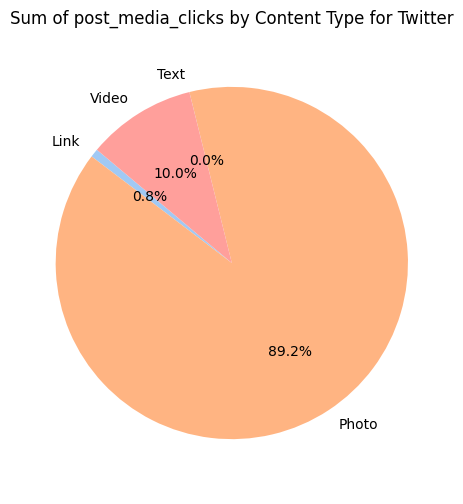

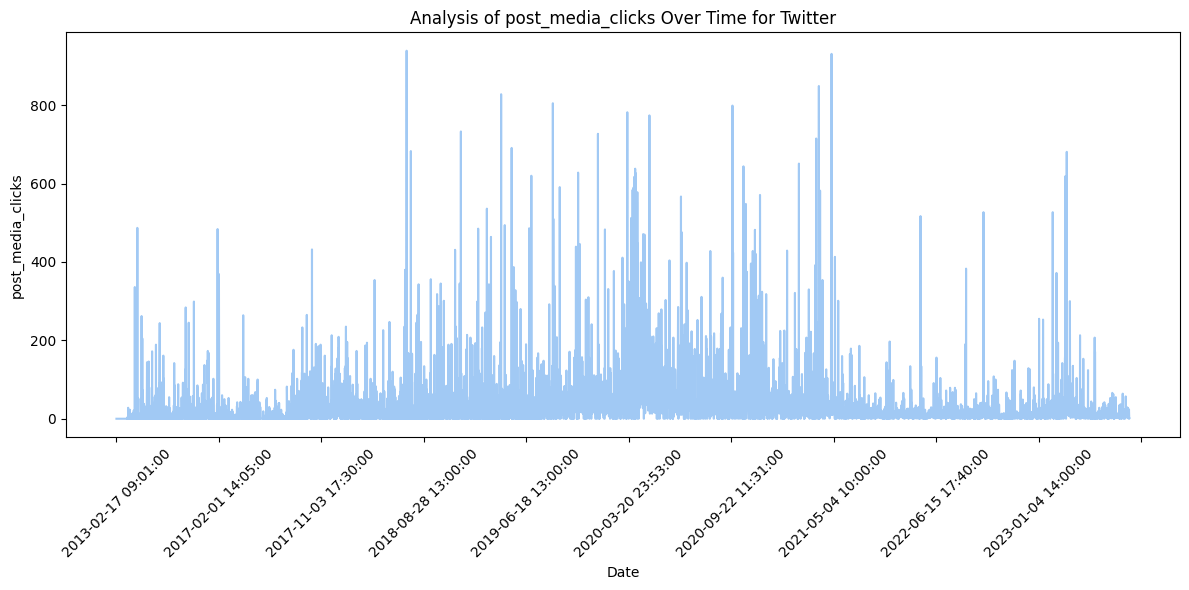

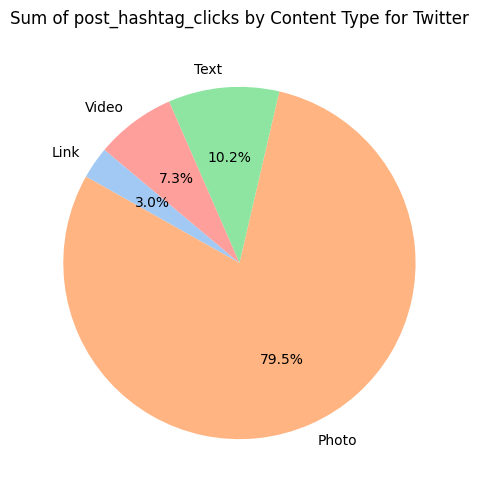

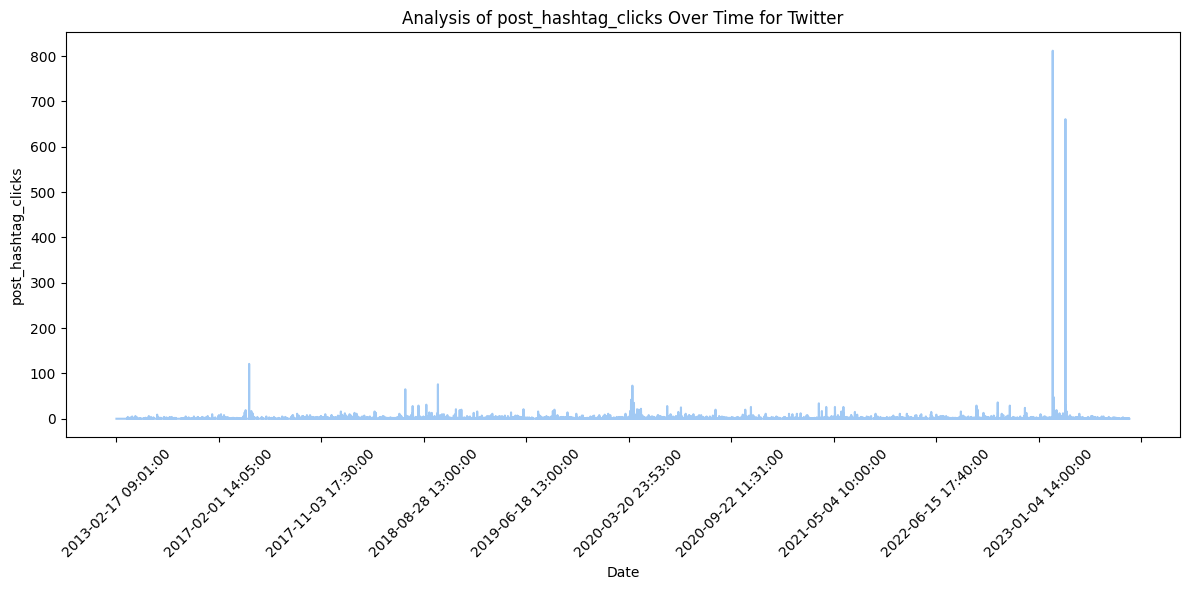

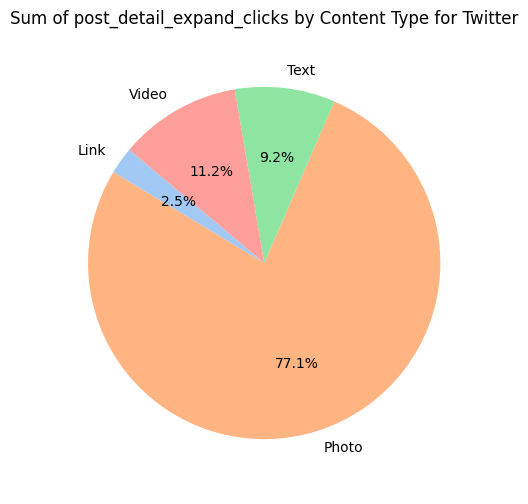

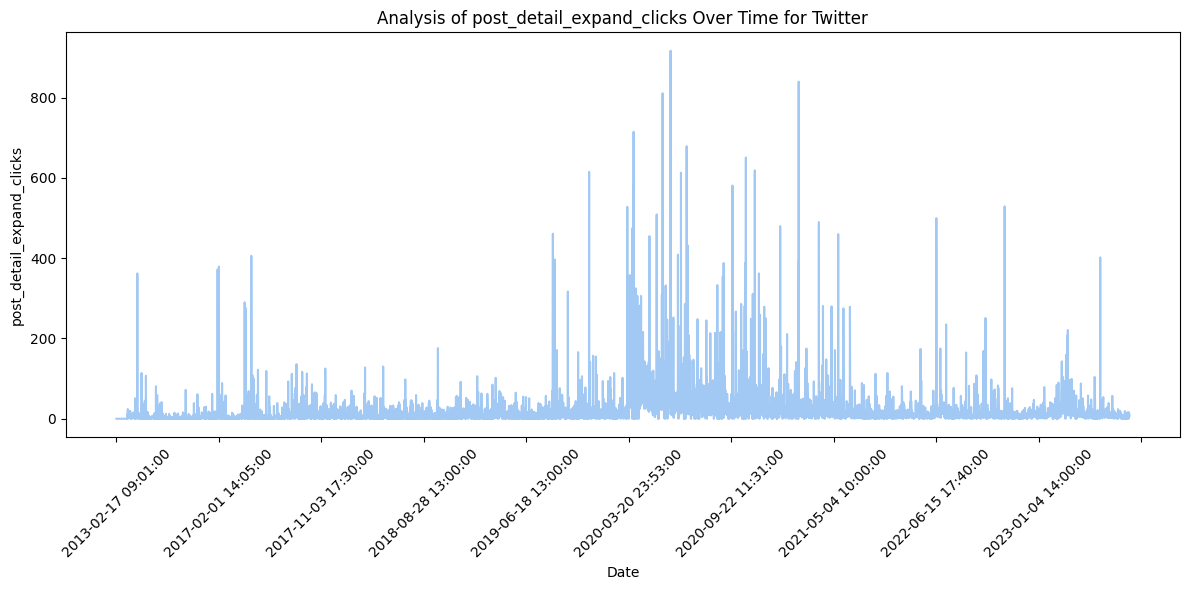

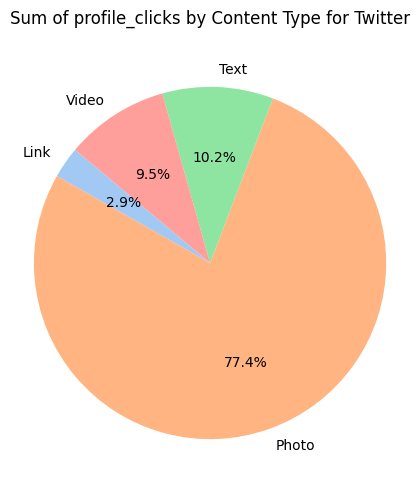

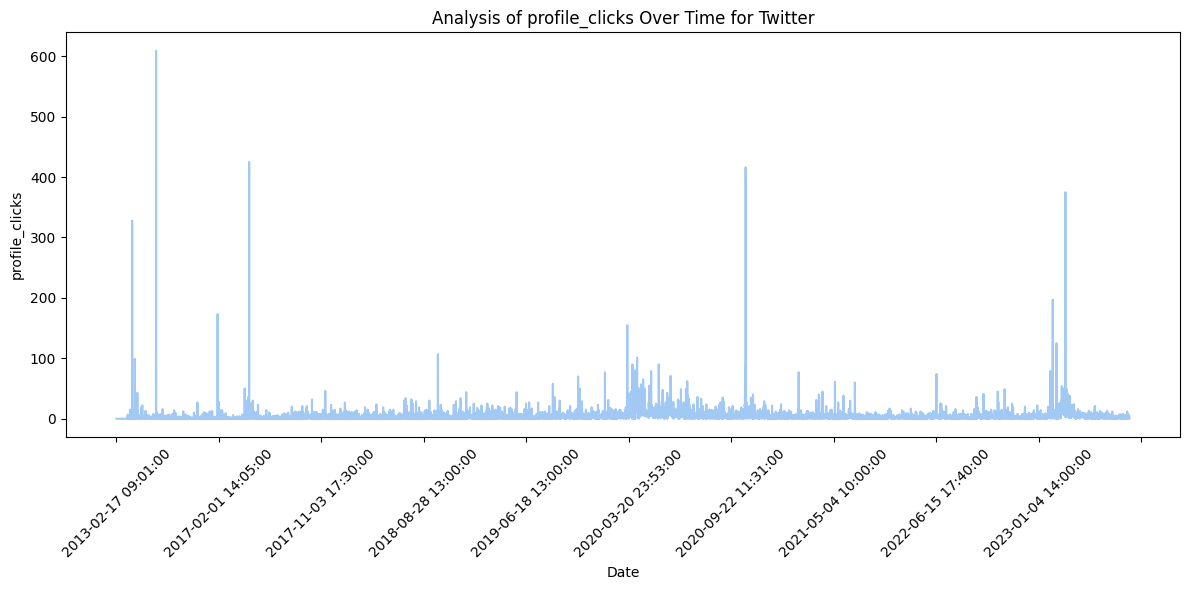

In [2]:
# Define a dictionary of file paths for cleaned datasets
cleaned_data_paths = {
    "Facebook": "../data/interim/Facebook_cleaned.csv",
    "Instagram": "../data/interim/Instagram_cleaned.csv",
    "LinkedIn": "../data/interim/LinkedIn_cleaned.csv",
    "Twitter": "../data/interim/Twitter_cleaned.csv"
}

# Create a dictionary to store EDA summary information
eda_summary = {}

# Initialize overall summary information for platform comparisons
overall_summary = {
    "Engagement by Content Type": {},
    "Impressions by Content Type": {}
}

# Iterate through the datasets for EDA
for platform, file_path in cleaned_data_paths.items():
    # Load the cleaned dataset
    df = pd.read_csv(file_path)

    # Display the first few rows of the dataset to understand its structure
    print(f"First 5 rows of the {platform} dataset:")
    print(df.head())

    # Check the basic information about the dataset
    print(f"\n{platform} Dataset Information:")
    print(df.info())

    # Summary statistics of numeric columns
    print(f"\n{platform} Summary Statistics:")
    print(df.describe())

    # Check for missing values
    print(f"\n{platform} Missing Values:")
    print(df.isnull().sum())

    # Initialize a dictionary to store summary information for this dataset
    summary_info = {}

    # Basic dataset information
    summary_info["Dataset Information"] = df.info()

    # Summary statistics of numeric columns
    numeric_summary = df.describe().to_dict()
    summary_info["Summary Statistics"] = numeric_summary

    # Check for missing values
    missing_values = df.isnull().sum().to_dict()
    summary_info["Missing Values"] = missing_values

    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # Data visualization and insights for numeric columns
    insights = {}
    for col in numeric_columns:
        if col != 'date':  # Exclude the date column
            insights[col] = {}
            unique_values = df[col].unique()
            # Check if 'content_type' column exists in the dataset
            if 'content_type' in df.columns:
                if len(unique_values) == 1 and unique_values[0] == 0:
                    insights[col]["Distribution"] = f"The column {col} contains only the value 0 and cannot be plotted."
                else:
                    
                    # Group the da
                    # ta by 'content_type' and calculate the sum of the numerical column
                    likes_by_content_type = df.groupby('content_type')[col].sum()

                    # Create a pie chart for likes distribution by content type
                    plt.figure(figsize=(5, 6))
                    sns.set_palette("pastel")  # Set a pastel color palette for pie charts

                    labels = likes_by_content_type.index
                    sizes = likes_by_content_type.values

                    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
                    plt.title(f'Sum of {col} by Content Type for {platform}')
                    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
                    plt.show()
                    insights[col]["Distribution"] = "Pie chart of likes distribution by content type."

            # Analysis over time (if date column exists)
            if 'date' in df.columns:
                if len(unique_values) == 1 and unique_values[0] == 0:
                    insights[col]["Analysis Over Time"] = f"The column {col} contains only the value 0 and is negleted."
                else:
                    plt.figure(figsize=(12, 6))
                    plt.plot(df['date'], df[col])
                    plt.title(f'Analysis of {col} Over Time for {platform}')
                    plt.xlabel('Date')
                    plt.ylabel(col)

                    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
                    
                    # Limit the number of x-axis labels by specifying a step value
                    step = max(len(df['date']) // 10, 1)  # Adjust the divisor for desired label frequency
                    plt.xticks(np.arange(0, len(df['date']), step), rotation=45)  # Rotate x-axis labels

                    plt.tight_layout()
                    plt.show()
                    insights[col]["Analysis Over Time"] = f"Line chart of {col} over time."

    summary_info["Column Insights"] = insights

    # Calculate engagement and impressions by content type
    if 'content_type' in df.columns:
        engagement_by_content_type = df.groupby('content_type')['engagements'].sum().to_dict()
        impressions_by_content_type = df.groupby('content_type')['impressions'].sum().to_dict()

        # Add platform-specific data to the overall summary for platform comparisons
        overall_summary["Engagement by Content Type"][platform] = engagement_by_content_type
        overall_summary["Impressions by Content Type"][platform] = impressions_by_content_type

    # Add the summary information to the EDA summary dictionary
    eda_summary[platform] = summary_info



# SUMMARY

In [7]:
# Print or save the EDA summary report as needed
for platform, summary_info in eda_summary.items():
    print(f"Summary for {platform} Dataset:")
    for section, content in summary_info.items():
        print(f"\n{section}:")
        if isinstance(content, dict):
            for key, value in content.items():
                print(f"  {key}: {value}")
        else:
            print(content)
    print("\n" + "=" * 50 + "\n")



Summary for Facebook Dataset:

Dataset Information:
None

Summary Statistics:
  impressions: {'count': 9553.0, 'mean': 15.517429079870197, 'std': 106.66576960667835, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 999.0}
  organic_impressions: {'count': 9553.0, 'mean': 15.51428870511881, 'std': 106.63901653292614, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 999.0}
  viral_impressions: {'count': 9553.0, 'mean': 122.30650057573537, 'std': 218.3200425343155, 'min': 0.0, '25%': 0.0, '50%': 10.0, '75%': 139.0, 'max': 999.0}
  non_viral_impressions: {'count': 9553.0, 'mean': 16.621689521616247, 'std': 108.5404427873324, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 998.0}
  paid_impressions: {'count': 9553.0, 'mean': 0.0, 'std': 0.0, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 0.0}
  engagement_rate_per_impression: {'count': 9553.0, 'mean': 0.0, 'std': 0.0, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 0.0}
  engagement_rate_per_reach: {'count':

# COMPARISON

C:\Users\charl\AppData\Local\Temp\ipykernel_7816\3535670733.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=impressions_df, x="network", y="impressions", hue="content_type", ci=None)


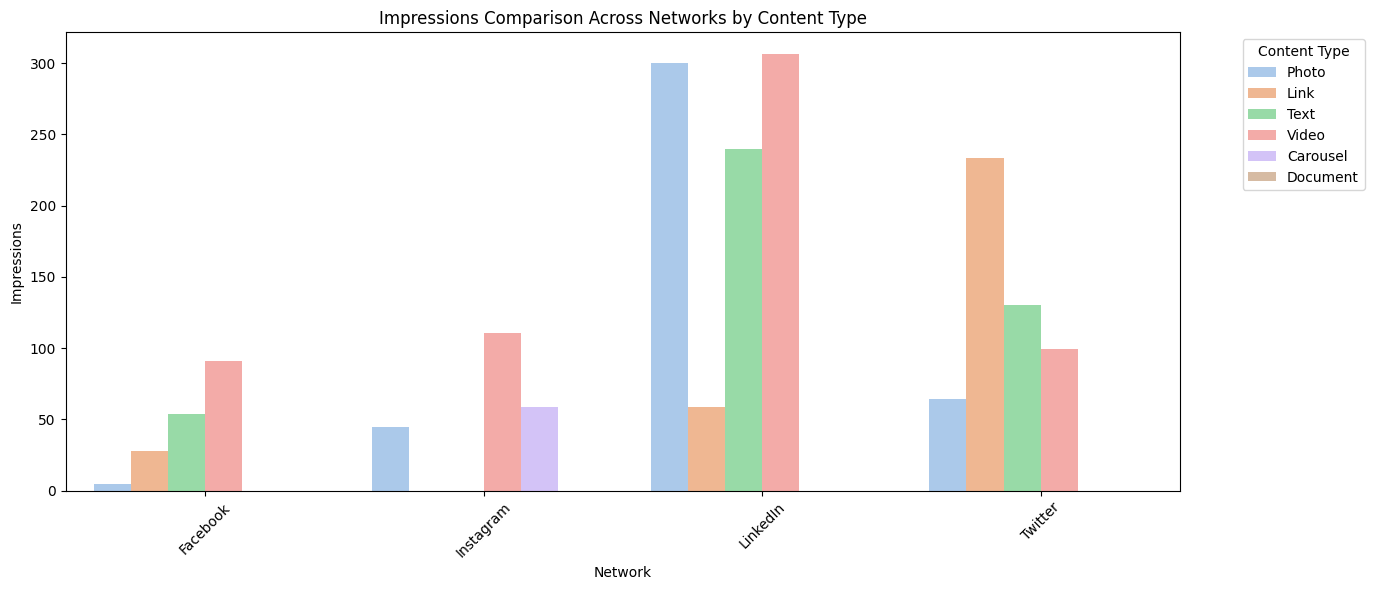

C:\Users\charl\AppData\Local\Temp\ipykernel_7816\3535670733.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=engagements_df, x="network", y="engagements", hue="content_type", ci=None)


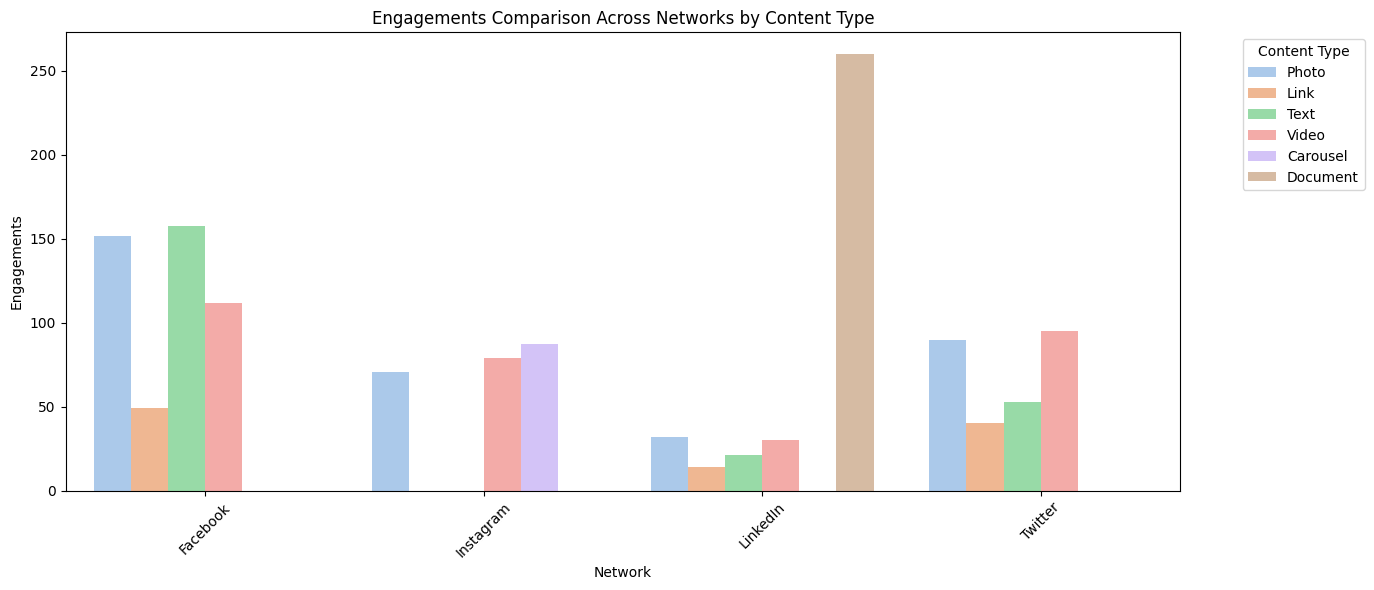

In [4]:
# Initialize empty DataFrames to store data for impressions and engagements
impressions_df = pd.DataFrame()
engagements_df = pd.DataFrame()

# Iterate through the datasets for EDA
for platform, file_path in cleaned_data_paths.items():
    # Load the cleaned dataset
    df = pd.read_csv(file_path)

    # Merge the data into the respective DataFrames
    impressions_df = pd.concat([impressions_df, df[['network', 'content_type', 'impressions']]], ignore_index=True)
    engagements_df = pd.concat([engagements_df, df[['network', 'content_type', 'engagements']]], ignore_index=True)

# Create a clustered column chart for impressions by content type
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")  # Set a pastel color palette for the chart
sns.barplot(data=impressions_df, x="network", y="impressions", hue="content_type", ci=None)
plt.title("Impressions Comparison Across Networks by Content Type")
plt.xlabel("Network")
plt.ylabel("Impressions")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.legend(title="Content Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Create a clustered column chart for engagements by content type
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")  # Set a pastel color palette for the chart
sns.barplot(data=engagements_df, x="network", y="engagements", hue="content_type", ci=None)
plt.title("Engagements Comparison Across Networks by Content Type")
plt.xlabel("Network")
plt.ylabel("Engagements")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.legend(title="Content Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
